C:\Users\riakh\AppData\Local\Temp\ipykernel_24120\3209002967.py:38: DeprecationWarning: The return type of saved statevectors has been changed from a `numpy.ndarray` to a `qiskit.quantum_info.Statevector` as of qiskit-aer 0.10. Accessing numpy array attributes is deprecated and will result in an error in a future release. To continue using saved result objects as arrays you can explicitly cast them using  `np.asarray(object)`.
  for i, amp in enumerate(statevector):


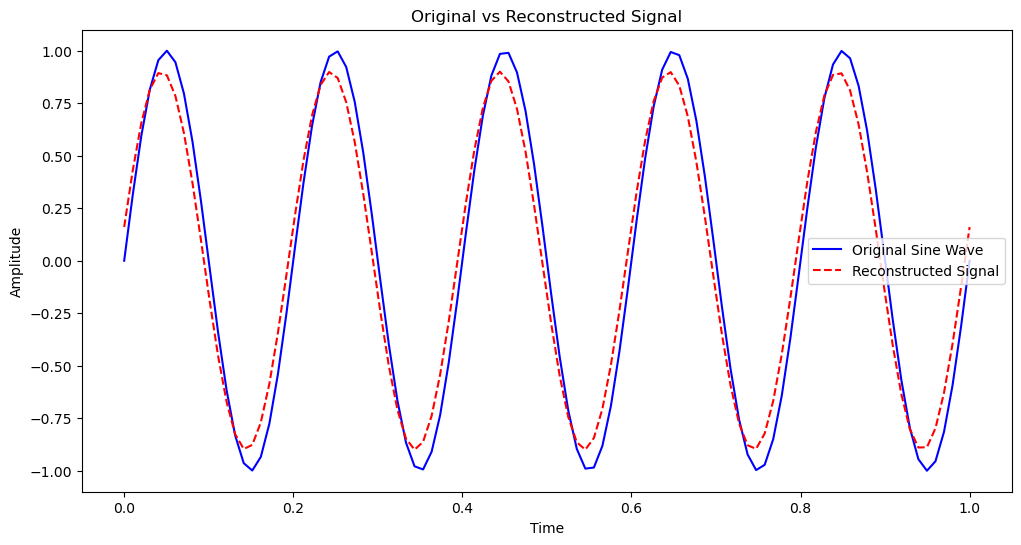

In [43]:
import numpy as np
import matplotlib.pyplot as plt
from qiskit import QuantumCircuit, Aer, execute

# Constants
NUM_QUBITS = 8  # Number of qubits
NUM_SAMPLES = 100  # Number of samples
FREQUENCY = 5  # Frequency of the sine wave

def generate_spikes(num_samples=NUM_SAMPLES, frequency=FREQUENCY):
    t = np.linspace(0, 1, num_samples)
    signal = np.sin(2 * np.pi * frequency * t)
    normalized_signal = (signal - np.min(signal)) / (np.max(signal) - np.min(signal)) * 5 + 1
    spikes = np.random.poisson(normalized_signal)
    return spikes, t

def calculate_phase(time):
    return 2 * np.pi * FREQUENCY * time

def enhanced_quantum_circuit(spikes, t):
    qc = QuantumCircuit(NUM_QUBITS)
    max_spike = max(spikes) if spikes else 1
    for i, (spike_count, time) in enumerate(zip(spikes, t)):
        normalized_amplitude = (spike_count / max_spike) * np.pi / 4
        phase = calculate_phase(time)
        qc.u(normalized_amplitude, phase, -phase, i % NUM_QUBITS)

    simulator = Aer.get_backend('statevector_simulator')
    job = execute(qc, simulator)
    result = job.result()
    return result.get_statevector(qc)

def complex_amplitude_reconstruction(statevector, t):
    reconstructed_signal = np.zeros_like(t)
    for i, amp in enumerate(statevector):
        reconstructed_signal += abs(amp) * np.sin(2 * np.pi * FREQUENCY * t + np.angle(amp))
    return reconstructed_signal

def plot_results(t, original_signal, reconstructed_signal):
    plt.figure(figsize=(12, 6))
    plt.plot(t, original_signal, 'b-', label='Original Sine Wave')
    plt.plot(t, reconstructed_signal, 'r--', label='Reconstructed Signal')
    plt.title("Original vs Reconstructed Signal")
    plt.xlabel("Time")
    plt.ylabel("Amplitude")
    plt.legend()
    plt.show()

def main():
    spikes, t = generate_spikes()
    statevector = enhanced_quantum_circuit(spikes, t)
    reconstructed_signal = complex_amplitude_reconstruction(statevector, t)
    plot_results(t, np.sin(2 * np.pi * FREQUENCY * t), reconstructed_signal)

if __name__ == "__main__":
    main()


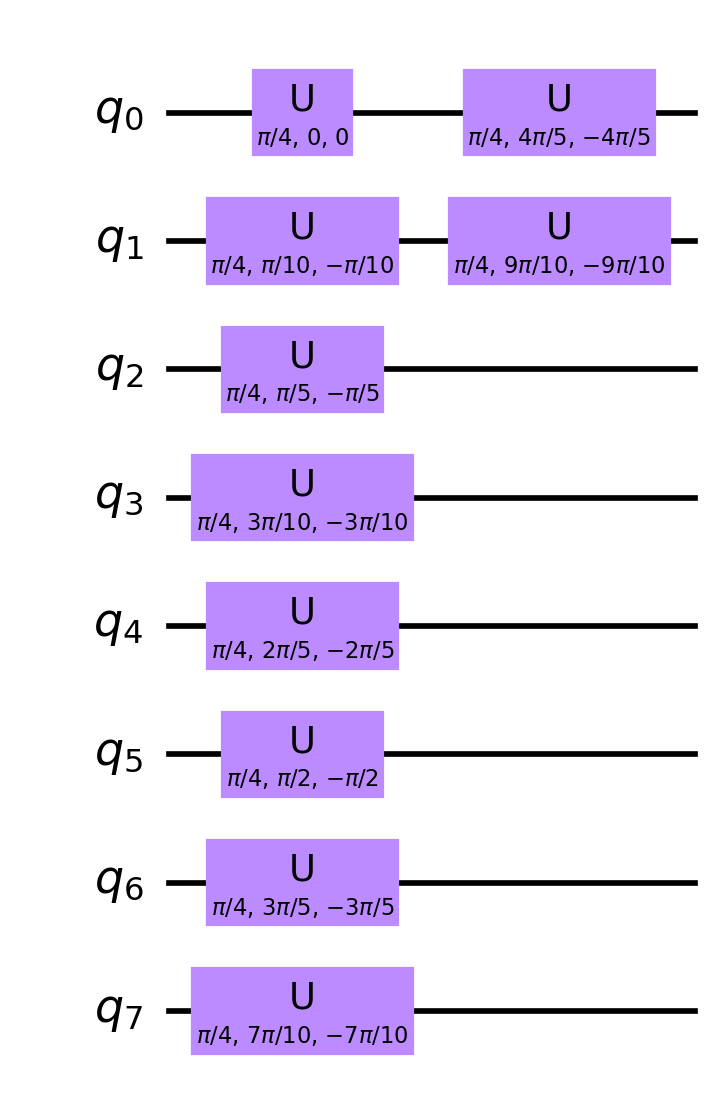

In [204]:
from qiskit import QuantumCircuit
import numpy as np
import matplotlib.pyplot as plt


NUM_QUBITS = 8
NUM_SAMPLES = 10  # Reduced for simplicity in the circuit diagram

def example_quantum_circuit():
    """Example of setting up a quantum circuit with arbitrary parameters for demonstration."""
    qc = QuantumCircuit(NUM_QUBITS)
    for i in range(NUM_SAMPLES):
        normalized_amplitude = np.pi / 4  # Example value for amplitude
        phase = np.pi * i / NUM_SAMPLES  # Linearly increasing phase example
        qc.u(normalized_amplitude, phase, -phase, i % NUM_QUBITS)

    return qc


qc_example = example_quantum_circuit()


fig, ax = plt.subplots(figsize=(10, 14))  
qc_example.draw('mpl', ax=ax)
plt.show()  


In [66]:
pip install pydot

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [67]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


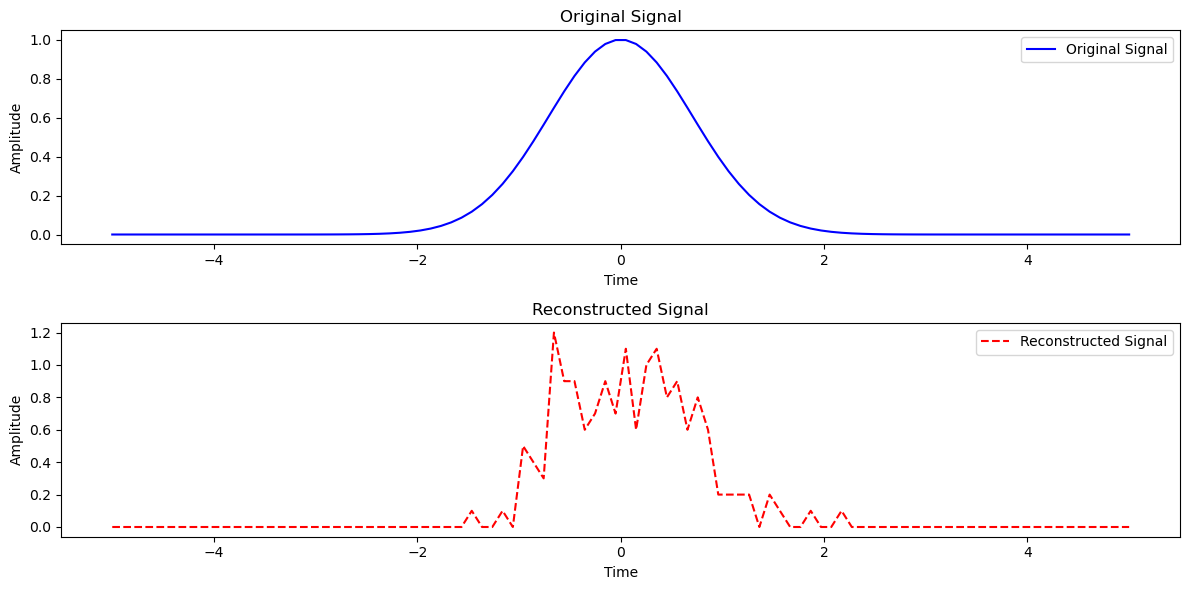

In [119]:
import numpy as np
import matplotlib.pyplot as plt
from qiskit import QuantumCircuit, Aer, execute

# Constants
NUM_QUBITS = 8  # Adjust based on the complexity
NUM_SAMPLES = 100  # Number of samples

def generate_gaussian(num_samples=NUM_SAMPLES):
    """Generates a Gaussian function."""
    t = np.linspace(-5, 5, num_samples)
    signal = np.exp(-t**2)
    normalized_signal = (signal - np.min(signal)) / (np.max(signal) - np.min(signal)) * 5 + 1
    spikes = np.random.poisson(normalized_signal)
    return spikes, t, signal

def quantum_circuit(spikes, t):
    """Encodes spikes into quantum states using a more refined approach."""
    qc = QuantumCircuit(NUM_QUBITS)
    for i, spike in enumerate(spikes):
        phase = 2 * np.pi * t[i]  
        amplitude = np.pi * (spike / max(spikes)) 
        qc.rx(amplitude, i % NUM_QUBITS)  
        qc.rz(phase, i % NUM_QUBITS)  

    # Add CNOT gates for entanglement
    for i in range(NUM_QUBITS - 1):
        qc.cx(i, i + 1)

    simulator = Aer.get_backend('statevector_simulator')
    job = execute(qc, simulator)
    result = job.result()
    return result.get_statevector(qc)

def reconstruct_signal(statevector, t, spikes):
    """Reconstructs the signal from the quantum state using a more complex method."""
    statevector_data = np.array(statevector.data)  # Extract numerical data from the statevector
    reconstructed_signal = np.zeros(len(spikes))
    scale_factor = max(spikes) / max(abs(statevector_data))  # Calculate the scaling factor
    for i, amp in enumerate(statevector_data):
        reconstructed_signal += scale_factor * abs(amp) * np.array(spikes)
    return reconstructed_signal

def plot_results(t, original_signal, reconstructed_signal):
    """Plots the original and reconstructed signals."""
    plt.figure(figsize=(12, 6))
    plt.subplot(2, 1, 1)
    plt.plot(t, original_signal, 'b-', label='Original Signal')
    plt.title("Original Signal")
    plt.xlabel("Time")
    plt.ylabel("Amplitude")
    plt.legend()

    plt.subplot(2, 1, 2)
    plt.plot(t, reconstructed_signal, 'r--', label='Reconstructed Signal')
    plt.title("Reconstructed Signal")
    plt.xlabel("Time")
    plt.ylabel("Amplitude")
    plt.legend()

    plt.tight_layout()
    plt.show()

def main():
    spikes, t, original_signal = generate_gaussian()
    statevector = quantum_circuit(spikes, t)
    reconstructed_signal = reconstruct_signal(statevector, t, spikes)
    plot_results(t, original_signal, reconstructed_signal)

if __name__ == "__main__":
    main()


Original signal: [0.00247262 0.00279037 0.00314881 0.00355314 0.00400918 0.00452348
 0.00510342 0.00575729 0.00649438 0.00732514 0.00826129 0.00931596
 0.01050384 0.01184139 0.01334695 0.01504103 0.01694644 0.01908854
 0.0214955  0.02419847 0.02723188 0.03063359 0.0344452  0.03871212
 0.04348381 0.04881379 0.05475969 0.06138311 0.06874939 0.07692721
 0.08598797 0.09600494 0.10705215 0.11920292 0.13252816 0.14709422
 0.16296047 0.18017659 0.1987796  0.21879075 0.24021244 0.26302536
 0.2871859  0.31262432 0.33924363 0.36691963 0.39550202 0.42481687
 0.45467026 0.48485312 0.51514688 0.54532974 0.57518313 0.60449798
 0.63308037 0.66075637 0.68737568 0.7128141  0.73697464 0.75978756
 0.78120925 0.8012204  0.81982341 0.83703953 0.85290578 0.86747184
 0.88079708 0.89294785 0.90399506 0.91401203 0.92307279 0.93125061
 0.93861689 0.94524031 0.95118621 0.95651619 0.96128788 0.9655548
 0.96936641 0.97276812 0.97580153 0.9785045  0.98091146 0.98305356
 0.98495897 0.98665305 0.98815861 0.98949616 0

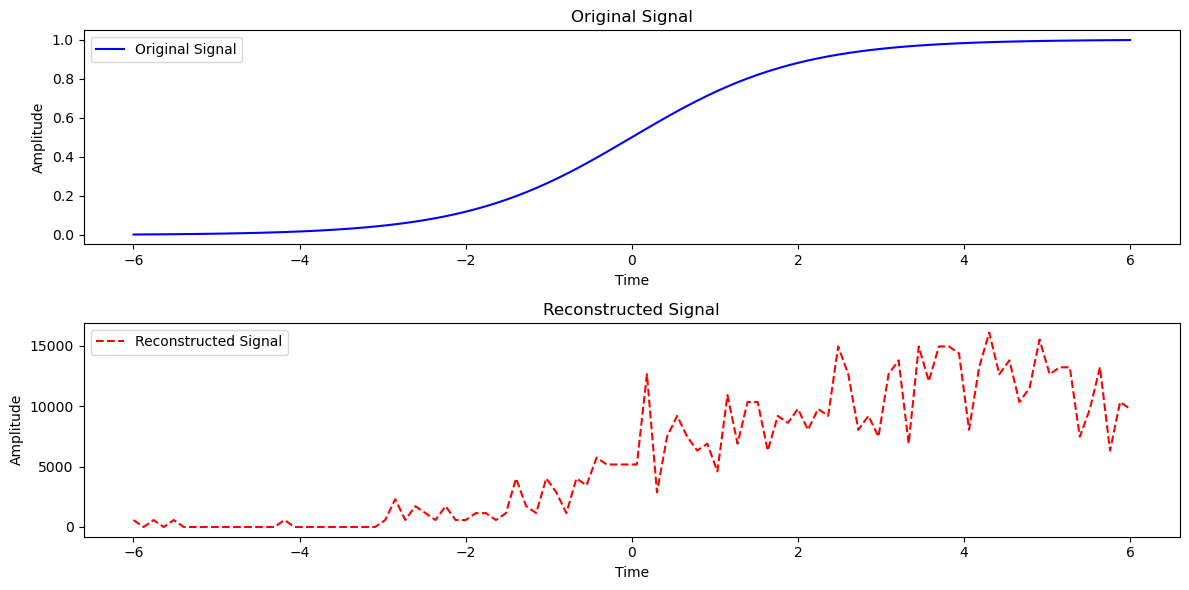

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from qiskit import QuantumCircuit, Aer, execute

# Constants
NUM_QUBITS = 8  # Number of qubits, adjust if necessary
NUM_SAMPLES = 100  # Number of samples

def generate_spikes_log(num_samples=NUM_SAMPLES):
    """Generates spikes based on a logarithmic function."""
    t = np.linspace(0.01, 1, num_samples)  # Avoid zero to prevent log(0)
    signal = np.log(t)
    normalized_signal = (signal - np.min(signal)) / (np.max(signal) - np.min(signal)) * 5 + 1
    spikes = np.random.poisson(normalized_signal)
    return spikes, t, signal

def generate_spikes_sigmoid(num_samples=NUM_SAMPLES):
    """Generates spikes based on a sigmoid function."""
    t = np.linspace(-6, 6, num_samples)  # Range to capture the sigmoid shape well
    signal = 1 / (1 + np.exp(-t))
    normalized_signal = (signal - np.min(signal)) / (np.max(signal) - np.min(signal)) * 5 + 1
    spikes = np.random.poisson(normalized_signal)
    return spikes, t, signal

def calculate_phase(time):
    """Calculates phase based on time for encoding."""
    return 2 * np.pi * time

def enhanced_quantum_circuit(spikes, t):
    """Uses amplitude and phase information for encoding."""
    qc = QuantumCircuit(NUM_QUBITS)
    max_spike = max(spikes) if spikes else 1
    for i, (spike_count, time) in enumerate(zip(spikes, t)):
        normalized_amplitude = (spike_count / max_spike) * np.pi  
        phase = calculate_phase(time)
        qc.u(normalized_amplitude, phase, -phase, i % NUM_QUBITS)

    simulator = Aer.get_backend('statevector_simulator')
    job = execute(qc, simulator)
    result = job.result()
    return result.get_statevector(qc)

def spike_reconstruction(statevector, spikes):
    """Reconstructs the signal using the spikes generated."""
    statevector_data = np.array(statevector.data)  # Extract numerical data from the statevector
    reconstructed_signal = np.zeros(len(spikes))
    scale_factor = max(spikes) / max(abs(statevector_data))  # Calculate the scaling factor
    for i, amp in enumerate(statevector_data):
        reconstructed_signal += scale_factor * abs(amp) * np.array(spikes)
    return reconstructed_signal

def plot_results(t, original_signal, reconstructed_signal):
    """Plots the original and reconstructed signals separately."""
    plt.figure(figsize=(12, 6))

    plt.subplot(2, 1, 1)
    plt.plot(t, original_signal, 'b-', label='Original Signal')
    plt.title("Original Signal")
    plt.xlabel("Time")
    plt.ylabel("Amplitude")
    plt.legend()

    plt.subplot(2, 1, 2)
    plt.plot(t, reconstructed_signal, 'r--', label='Reconstructed Signal')
    plt.title("Reconstructed Signal")
    plt.xlabel("Time")
    plt.ylabel("Amplitude")
    plt.legend()

    plt.tight_layout()
    plt.show()

def main():
    # Choose the function to test: "log" or "sigmoid"
    function_to_test = "sigmoid"

    if function_to_test == "log":
        spikes, t, original_signal = generate_spikes_log()
    elif function_to_test == "sigmoid":
        spikes, t, original_signal = generate_spikes_sigmoid()
    else:
        raise ValueError("Invalid function choice. Use 'log' or 'sigmoid'.")

    print("Original signal:", original_signal)  
    print("Generated spikes:", spikes) 

    statevector = enhanced_quantum_circuit(spikes, t)
    reconstructed_signal = spike_reconstruction(statevector, spikes)
    plot_results(t, original_signal, reconstructed_signal)

if __name__ == "__main__":
    main()


C:\Users\riakh\AppData\Local\Temp\ipykernel_8660\896129323.py:26: DeprecationWarning: The method ``qiskit.circuit.quantumcircuit.QuantumCircuit.bind_parameters()`` is deprecated as of qiskit 0.45.0. It will be removed no earlier than 3 months after the release date. Use assign_parameters() instead
  compiled_circuit = qc.bind_parameters(param_dict)


Epoch 1/500
100/100 [==============================] - 3s 2ms/step - loss: 1.2969
Epoch 2/500
100/100 [==============================] - 0s 2ms/step - loss: 0.2617
Epoch 3/500
100/100 [==============================] - 0s 2ms/step - loss: 0.2080
Epoch 4/500
100/100 [==============================] - 0s 2ms/step - loss: 0.1039
Epoch 5/500
100/100 [==============================] - 0s 2ms/step - loss: 0.0826
Epoch 6/500
100/100 [==============================] - 0s 2ms/step - loss: 0.1058
Epoch 7/500
100/100 [==============================] - 0s 2ms/step - loss: 0.1292
Epoch 8/500
100/100 [==============================] - 0s 2ms/step - loss: 0.0798
Epoch 9/500
100/100 [==============================] - 0s 2ms/step - loss: 0.0827
Epoch 10/500
100/100 [==============================] - 0s 3ms/step - loss: 0.0605
Epoch 11/500
100/100 [==============================] - 0s 2ms/step - loss: 0.0392
Epoch 12/500
100/100 [==============================] - 0s 2ms/step - loss: 0.0701
Epoch 13/500


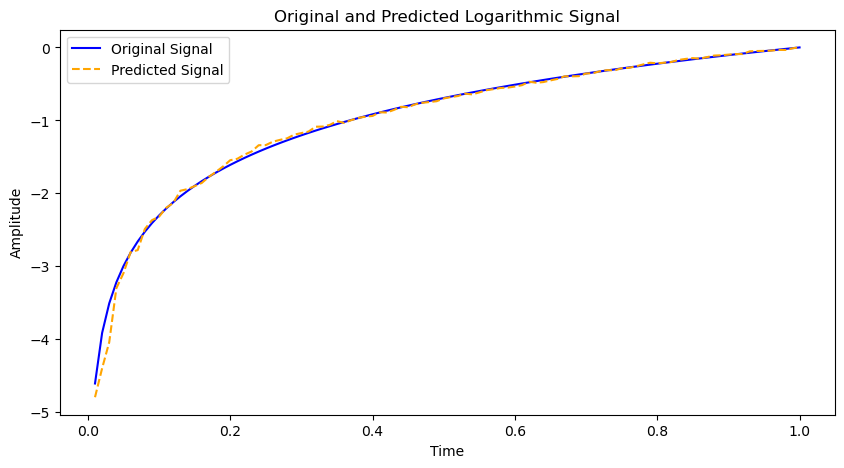

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from qiskit import QuantumCircuit, Aer, execute
from qiskit.circuit import ParameterVector
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler

NUM_QUBITS = 8  # Number of qubits

def generate_spikes_log(num_samples):
    """Generates spikes based on a logarithmic function."""
    t = np.linspace(0.01, 1, num_samples)  # Avoid zero to prevent log(0)
    signal = np.log(t)  # Logarithmic function
    normalized_signal = (signal - np.min(signal)) / (np.max(signal) - np.min(signal)) * 5 + 1
    spikes = np.random.poisson(normalized_signal)
    return spikes, t

def quantum_circuit(spikes, t):
    """Encodes spikes into quantum states using a more refined approach."""
    qc = QuantumCircuit(NUM_QUBITS)
    max_spike = max(spikes) if spikes else 1  # Avoid division by zero
    for i, (spike_count, time) in enumerate(zip(spikes, t)):
        normalized_amplitude = (spike_count / max_spike) * np.pi  
        phase = 2 * np.pi * time  
        qc.rx(normalized_amplitude, i % NUM_QUBITS)  
        qc.rz(phase, i % NUM_QUBITS)  

    # Add CNOT gates for entanglement
    for i in range(NUM_QUBITS - 1):
        qc.cx(i, i + 1)

    simulator = Aer.get_backend('statevector_simulator')
    job = execute(qc, simulator)
    result = job.result()
    return result.get_statevector(qc)

def build_lstm_model(input_shape):
    """Builds and returns an LSTM model."""
    model = Sequential([
        LSTM(100, return_sequences=True, input_shape=input_shape),
        Dropout(0.3),
        LSTM(100, return_sequences=True),
        Dropout(0.3),
        LSTM(100),
        Dropout(0.3),
        Dense(1)
    ])
    model.compile(optimizer='adam', loss='mse')
    return model

def main():
    num_samples = 100
    spikes, t = generate_spikes_log(num_samples)
    
    quantum_features = np.array([quantum_circuit([spike], [time]) for spike, time in zip(spikes, t)])

    scaler = MinMaxScaler()
    quantum_features_scaled = scaler.fit_transform(quantum_features)

    quantum_features_scaled = quantum_features_scaled.reshape((quantum_features_scaled.shape[0], 1, quantum_features_scaled.shape[1]))

    model = build_lstm_model((1, quantum_features_scaled.shape[2]))
    model.fit(quantum_features_scaled, spikes, epochs=500, batch_size=1, verbose=1)

   
    predicted_signal = model.predict(quantum_features_scaled)

    
    plt.figure(figsize=(10, 5))
    plt.plot(t, spikes, label='Original Signal', color='blue')
    plt.plot(t, predicted_signal.flatten(), linestyle='--', label='Predicted Signal', color='orange')
    plt.title('Original and Predicted Logarithmic Signal')
    plt.xlabel('Time')
    plt.ylabel('Amplitude')
    plt.legend()
    plt.show()

if __name__ == "__main__":
    main()


C:\Users\riakh\AppData\Local\Temp\ipykernel_8660\4138883218.py:38: DeprecationWarning: The method ``qiskit.circuit.quantumcircuit.QuantumCircuit.bind_parameters()`` is deprecated as of qiskit 0.45.0. It will be removed no earlier than 3 months after the release date. Use assign_parameters() instead
  compiled_circuit = qc.bind_parameters(param_dict)


Epoch 1/500
100/100 [==============================] - 3s 2ms/step - loss: 1.2412
Epoch 2/500
100/100 [==============================] - 0s 2ms/step - loss: 0.3673
Epoch 3/500
100/100 [==============================] - 0s 2ms/step - loss: 0.1290
Epoch 4/500
100/100 [==============================] - 0s 2ms/step - loss: 0.1097
Epoch 5/500
100/100 [==============================] - 0s 2ms/step - loss: 0.0991
Epoch 6/500
100/100 [==============================] - 0s 2ms/step - loss: 0.0832
Epoch 7/500
100/100 [==============================] - 0s 2ms/step - loss: 0.0879
Epoch 8/500
100/100 [==============================] - 0s 2ms/step - loss: 0.0762
Epoch 9/500
100/100 [==============================] - 0s 2ms/step - loss: 0.0691
Epoch 10/500
100/100 [==============================] - 0s 2ms/step - loss: 0.0720
Epoch 11/500
100/100 [==============================] - 0s 2ms/step - loss: 0.0549
Epoch 12/500
100/100 [==============================] - 0s 2ms/step - loss: 0.0427
Epoch 13/500


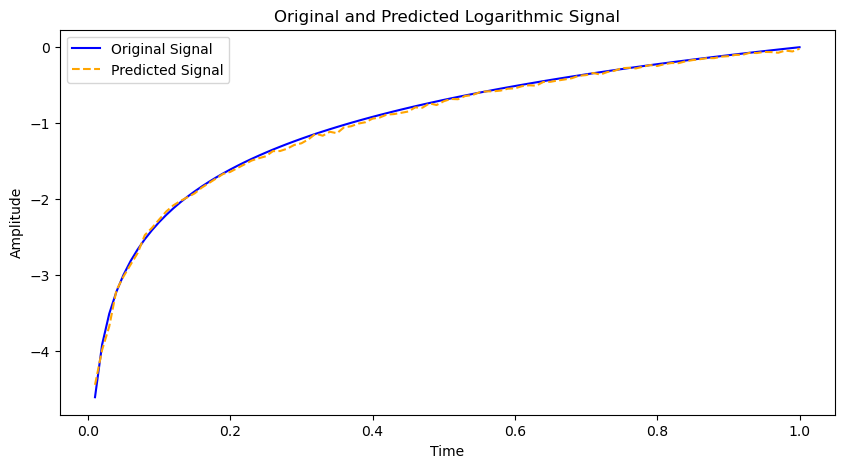

C:\Users\riakh\AppData\Local\Temp\ipykernel_8660\4138883218.py:38: DeprecationWarning: The method ``qiskit.circuit.quantumcircuit.QuantumCircuit.bind_parameters()`` is deprecated as of qiskit 0.45.0. It will be removed no earlier than 3 months after the release date. Use assign_parameters() instead
  compiled_circuit = qc.bind_parameters(param_dict)


Epoch 1/500
100/100 [==============================] - 4s 3ms/step - loss: 0.2193
Epoch 2/500
100/100 [==============================] - 0s 3ms/step - loss: 0.0303
Epoch 3/500
100/100 [==============================] - 0s 3ms/step - loss: 0.0124
Epoch 4/500
100/100 [==============================] - 0s 3ms/step - loss: 0.0070
Epoch 5/500
100/100 [==============================] - 0s 3ms/step - loss: 0.0098
Epoch 6/500
100/100 [==============================] - 0s 3ms/step - loss: 0.0078
Epoch 7/500
100/100 [==============================] - 0s 3ms/step - loss: 0.0066
Epoch 8/500
100/100 [==============================] - 0s 3ms/step - loss: 0.0044
Epoch 9/500
100/100 [==============================] - 0s 3ms/step - loss: 0.0049
Epoch 10/500
100/100 [==============================] - 0s 4ms/step - loss: 0.0042
Epoch 11/500
100/100 [==============================] - 0s 3ms/step - loss: 0.0065
Epoch 12/500
100/100 [==============================] - 0s 3ms/step - loss: 0.0064
Epoch 13/500


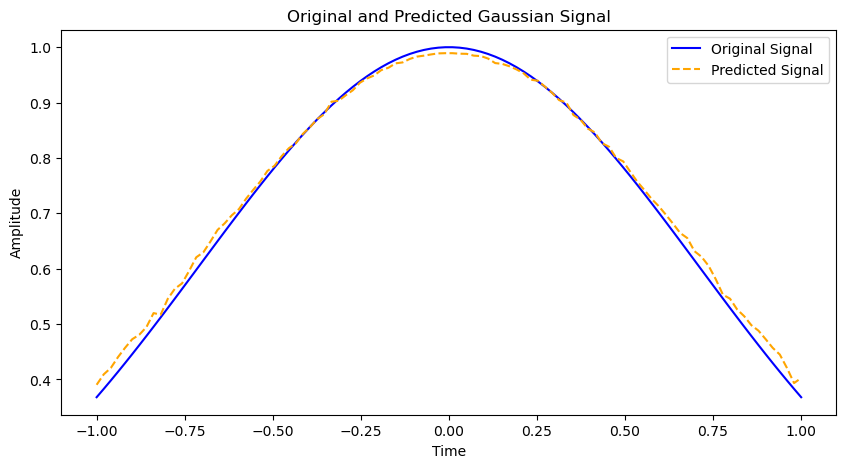

C:\Users\riakh\AppData\Local\Temp\ipykernel_8660\4138883218.py:38: DeprecationWarning: The method ``qiskit.circuit.quantumcircuit.QuantumCircuit.bind_parameters()`` is deprecated as of qiskit 0.45.0. It will be removed no earlier than 3 months after the release date. Use assign_parameters() instead
  compiled_circuit = qc.bind_parameters(param_dict)


Epoch 1/500
100/100 [==============================] - 3s 2ms/step - loss: 0.2593
Epoch 2/500
100/100 [==============================] - 0s 2ms/step - loss: 0.1859
Epoch 3/500
100/100 [==============================] - 0s 3ms/step - loss: 0.1713
Epoch 4/500
100/100 [==============================] - 0s 3ms/step - loss: 0.1715
Epoch 5/500
100/100 [==============================] - 0s 3ms/step - loss: 0.1731
Epoch 6/500
100/100 [==============================] - 0s 3ms/step - loss: 0.1756
Epoch 7/500
100/100 [==============================] - 0s 3ms/step - loss: 0.1716
Epoch 8/500
100/100 [==============================] - 0s 3ms/step - loss: 0.1825
Epoch 9/500
100/100 [==============================] - 0s 4ms/step - loss: 0.1739
Epoch 10/500
100/100 [==============================] - 0s 4ms/step - loss: 0.1654
Epoch 11/500
100/100 [==============================] - 0s 3ms/step - loss: 0.1675
Epoch 12/500
100/100 [==============================] - 0s 2ms/step - loss: 0.1617
Epoch 13/500


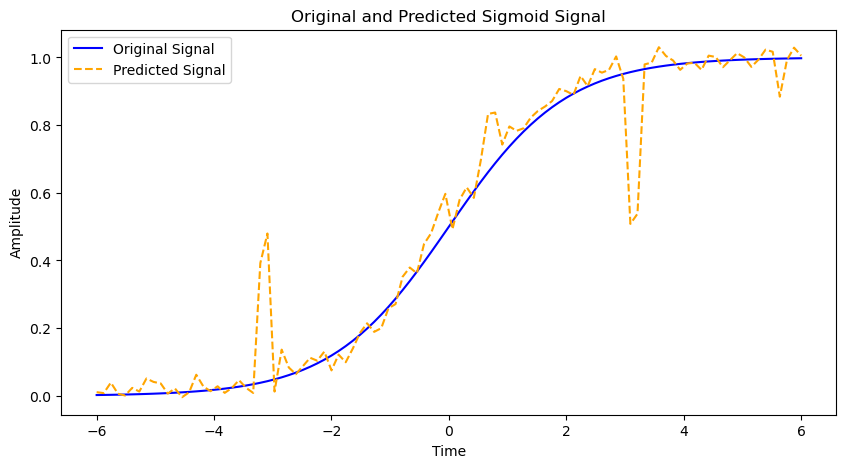

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from qiskit import QuantumCircuit, Aer, execute
from qiskit.circuit import ParameterVector
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler

NUM_QUBITS = 8  # Number of qubits

def generate_spikes_log(num_samples):
    t = np.linspace(0.01, 1, num_samples)  # Avoid zero to prevent log(0)
    signal = np.log(t)  # Logarithmic function
    normalized_signal = (signal - np.min(signal)) / (np.max(signal) - np.min(signal)) * 5 + 1
    spikes = np.random.poisson(normalized_signal)
    return spikes, t

def generate_spikes_gaussian(num_samples):
    t = np.linspace(-1, 1, num_samples)
    signal = np.exp(-t**2)  # Gaussian function
    normalized_signal = (signal - np.min(signal)) / (np.max(signal) - np.min(signal)) * 5 + 1
    spikes = np.random.poisson(normalized_signal)
    return spikes, t

def generate_spikes_sigmoid(num_samples):
    t = np.linspace(-6, 6, num_samples)
    signal = 1 / (1 + np.exp(-t))  # Sigmoid function
    normalized_signal = (signal - np.min(signal)) / (np.max(signal) - np.min(signal)) * 5 + 1
    spikes = np.random.poisson(normalized_signal)
    return spikes, t

def generate_quantum_features(time, num_qubits=5):
    params = ParameterVector('theta', num_qubits)
    qc = QuantumCircuit(num_qubits)
    for i in range(num_qubits):
        amplitude = np.sin(time * (i + 1)) * np.pi / 2
        phase = 2 * np.pi * time * (i + 1)
        qc.rx(amplitude, i % num_qubits)
        qc.rz(phase, i % num_qubits)
    
    for i in range(num_qubits - 1):
        qc.cx(i, i + 1)
    qc.measure_all()

    simulator = Aer.get_backend('aer_simulator')
    param_dict = {params[i]: np.sin(time * (i + 1)) for i in range(num_qubits)}
    compiled_circuit = qc.bind_parameters(param_dict)

    job = execute(compiled_circuit, simulator, shots=1024)
    result = job.result()
    counts = result.get_counts()

    features = np.array([counts.get(bin(i)[2:].zfill(num_qubits), 0) for i in range(2**num_qubits)])
    features = features / sum(features)
    return features

def build_lstm_model(input_shape):
    model = Sequential([
        LSTM(100, return_sequences=True, input_shape=input_shape),
        Dropout(0.3),
        LSTM(100, return_sequences=True),
        Dropout(0.3),
        LSTM(100),
        Dropout(0.3),
        Dense(1)
    ])
    model.compile(optimizer='adam', loss='mse')
    return model

def process_and_plot(signal_function, title):
    num_samples = 100
    num_qubits = 5
    spikes, t = signal_function(num_samples)
    
    quantum_features = np.array([generate_quantum_features(t_val, num_qubits) for t_val in t])

    scaler = MinMaxScaler()
    quantum_features_scaled = scaler.fit_transform(quantum_features)

    quantum_features_scaled = quantum_features_scaled.reshape((quantum_features_scaled.shape[0], 1, quantum_features_scaled.shape[1]))

    model = build_lstm_model((1, quantum_features_scaled.shape[2]))
    model.fit(quantum_features_scaled, spikes, epochs=500, batch_size=1, verbose=1)

    predicted_signal = model.predict(quantum_features_scaled)

    plt.figure(figsize=(10, 5))
    plt.plot(t, spikes, label='Original Signal', color='blue')
    plt.plot(t, predicted_signal.flatten(), linestyle='--', label='Predicted Signal', color='orange')
    plt.title(title)
    plt.xlabel('Time')
    plt.ylabel('Amplitude')
    plt.legend()
    plt.show()

def main():
    process_and_plot(generate_spikes_log, 'Original and Predicted Logarithmic Signal')
    process_and_plot(generate_spikes_gaussian, 'Original and Predicted Gaussian Signal')
    process_and_plot(generate_spikes_sigmoid, 'Original and Predicted Sigmoid Signal')

if __name__ == "__main__":
    main()


C:\Users\riakh\AppData\Local\Temp\ipykernel_20692\3280496629.py:43: DeprecationWarning: The method ``qiskit.circuit.quantumcircuit.QuantumCircuit.bind_parameters()`` is deprecated as of qiskit 0.45.0. It will be removed no earlier than 3 months after the release date. Use assign_parameters() instead
  compiled_circuit = qc.bind_parameters(param_dict)


Epoch 1/2000
100/100 [==============================] - 3s 2ms/step - loss: 0.2287
Epoch 2/2000
100/100 [==============================] - 0s 2ms/step - loss: 0.1824
Epoch 3/2000
100/100 [==============================] - 0s 2ms/step - loss: 0.1733
Epoch 4/2000
100/100 [==============================] - 0s 2ms/step - loss: 0.1759
Epoch 5/2000
100/100 [==============================] - 0s 2ms/step - loss: 0.1763
Epoch 6/2000
100/100 [==============================] - 0s 2ms/step - loss: 0.1701
Epoch 7/2000
100/100 [==============================] - 0s 2ms/step - loss: 0.1767
Epoch 8/2000
100/100 [==============================] - 0s 2ms/step - loss: 0.1655
Epoch 9/2000
100/100 [==============================] - 0s 2ms/step - loss: 0.1713
Epoch 10/2000
100/100 [==============================] - 0s 2ms/step - loss: 0.1664
Epoch 11/2000
100/100 [==============================] - 0s 2ms/step - loss: 0.1648
Epoch 12/2000
100/100 [==============================] - 0s 2ms/step - loss: 0.1542
E

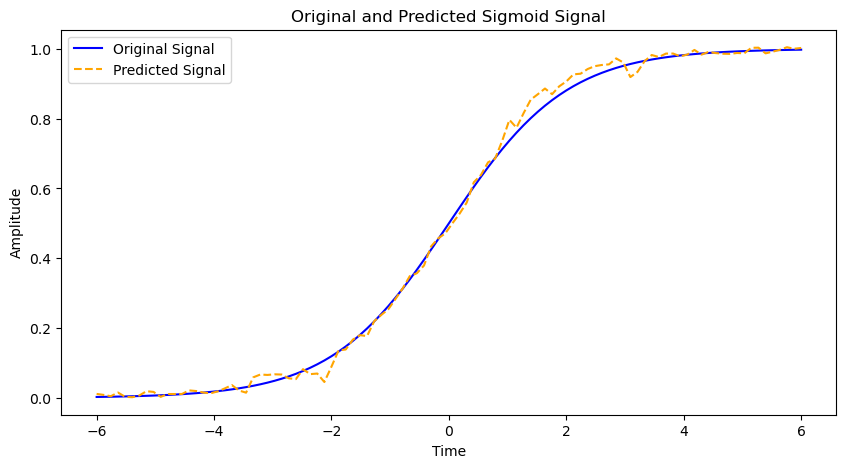

C:\Users\riakh\AppData\Roaming\Python\Python311\site-packages\qiskit\visualization\circuit\matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)
C:\Users\riakh\AppData\Local\Temp\ipykernel_20692\3280496629.py:43: DeprecationWarning: The method ``qiskit.circuit.quantumcircuit.QuantumCircuit.bind_parameters()`` is deprecated as of qiskit 0.45.0. It will be removed no earlier than 3 months after the release date. Use assign_parameters() instead
  compiled_circuit = qc.bind_parameters(param_dict)


Epoch 1/2000
100/100 [==============================] - 3s 2ms/step - loss: 0.4989
Epoch 2/2000
100/100 [==============================] - 0s 2ms/step - loss: 0.4963
Epoch 3/2000
100/100 [==============================] - 0s 3ms/step - loss: 0.5000
Epoch 4/2000
100/100 [==============================] - 0s 2ms/step - loss: 0.4987
Epoch 5/2000
100/100 [==============================] - 0s 2ms/step - loss: 0.4968
Epoch 6/2000
100/100 [==============================] - 0s 2ms/step - loss: 0.4977
Epoch 7/2000
100/100 [==============================] - 0s 2ms/step - loss: 0.4950
Epoch 8/2000
100/100 [==============================] - 0s 2ms/step - loss: 0.4968
Epoch 9/2000
100/100 [==============================] - 0s 2ms/step - loss: 0.4879
Epoch 10/2000
100/100 [==============================] - 0s 2ms/step - loss: 0.4869
Epoch 11/2000
100/100 [==============================] - 0s 3ms/step - loss: 0.4730
Epoch 12/2000
100/100 [==============================] - 0s 2ms/step - loss: 0.4787
E

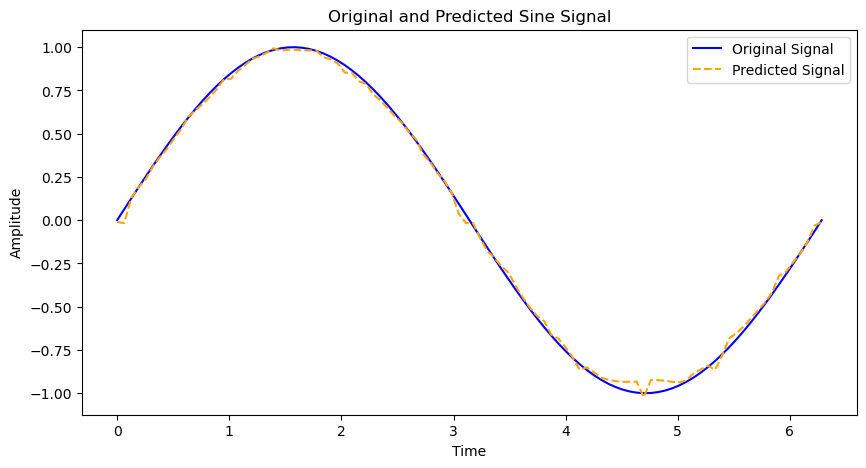

C:\Users\riakh\AppData\Roaming\Python\Python311\site-packages\qiskit\visualization\circuit\matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)
C:\Users\riakh\AppData\Local\Temp\ipykernel_20692\3280496629.py:43: DeprecationWarning: The method ``qiskit.circuit.quantumcircuit.QuantumCircuit.bind_parameters()`` is deprecated as of qiskit 0.45.0. It will be removed no earlier than 3 months after the release date. Use assign_parameters() instead
  compiled_circuit = qc.bind_parameters(param_dict)


Epoch 1/2000
100/100 [==============================] - 3s 2ms/step - loss: 0.5087
Epoch 2/2000
100/100 [==============================] - 0s 2ms/step - loss: 0.5080
Epoch 3/2000
100/100 [==============================] - 0s 2ms/step - loss: 0.5064
Epoch 4/2000
100/100 [==============================] - 0s 2ms/step - loss: 0.5105
Epoch 5/2000
100/100 [==============================] - 0s 2ms/step - loss: 0.5075
Epoch 6/2000
100/100 [==============================] - 0s 2ms/step - loss: 0.5071
Epoch 7/2000
100/100 [==============================] - 0s 2ms/step - loss: 0.5065
Epoch 8/2000
100/100 [==============================] - 0s 2ms/step - loss: 0.5086
Epoch 9/2000
100/100 [==============================] - 0s 2ms/step - loss: 0.5069
Epoch 10/2000
100/100 [==============================] - 0s 2ms/step - loss: 0.5059
Epoch 11/2000
100/100 [==============================] - 0s 2ms/step - loss: 0.5069
Epoch 12/2000
100/100 [==============================] - 0s 2ms/step - loss: 0.5050
E

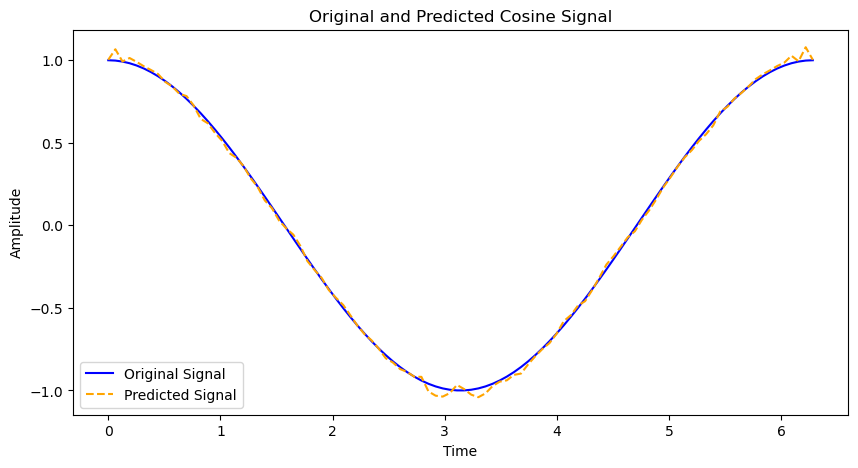

C:\Users\riakh\AppData\Roaming\Python\Python311\site-packages\qiskit\visualization\circuit\matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


In [6]:
import numpy as np
import matplotlib.pyplot as plt
from qiskit import QuantumCircuit, Aer, execute
from qiskit.circuit import ParameterVector
from qiskit.visualization import circuit_drawer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.utils import plot_model
from sklearn.preprocessing import MinMaxScaler

def generate_spikes_sigmoid(num_samples):
    t = np.linspace(-6, 6, num_samples)
    signal = 1 / (1 + np.exp(-t))  # Sigmoid function
    normalized_signal = (signal - np.min(signal)) / (np.max(signal) - np.min(signal)) * 5 + 1
    spikes = np.random.poisson(normalized_signal)
    return spikes, t

def generate_spikes_sine(num_samples):
    t = np.linspace(0, 2 * np.pi, num_samples)
    signal = np.sin(t)  # Sine function
    normalized_signal = (signal - np.min(signal)) / (np.max(signal) - np.min(signal)) * 5 + 1
    spikes = np.random.poisson(normalized_signal)
    return spikes, t

def generate_spikes_cosine(num_samples):
    t = np.linspace(0, 2 * np.pi, num_samples)
    signal = np.cos(t)  # Cosine function
    normalized_signal = (signal - np.min(signal)) / (np.max(signal) - np.min(signal)) * 5 + 1
    spikes = np.random.poisson(normalized_signal)
    return spikes, t

def generate_quantum_features(time, num_qubits=5):
    """Generate features using a parameterized quantum circuit for a single time value."""
    params = ParameterVector('theta', num_qubits)
    qc = QuantumCircuit(num_qubits)
    for i in range(num_qubits):
        amplitude = np.sin(time * (i + 1)) * np.pi / 2  
        phase = 2 * np.pi * time * (i + 1)  
        qc.rx(amplitude, i % num_qubits)
        qc.rz(phase, i % num_qubits)
    
    # Add CNOT gates for entanglement
    for i in range(num_qubits - 1):
        qc.cx(i, i + 1)
    qc.measure_all()

    
    simulator = Aer.get_backend('aer_simulator')
    param_dict = {params[i]: np.sin(time * (i + 1)) for i in range(num_qubits)}
    compiled_circuit = qc.bind_parameters(param_dict)

    
    job = execute(compiled_circuit, simulator, shots=1024)
    result = job.result()
    counts = result.get_counts()

    
    features = np.array([counts.get(bin(i)[2:].zfill(num_qubits), 0) for i in range(2**num_qubits)])
    features = features / sum(features)
    return features

def build_lstm_model(input_shape):
    model = Sequential([
        LSTM(100, return_sequences=True, input_shape=input_shape),
        Dropout(0.3),
        LSTM(100, return_sequences=True),
        Dropout(0.3),
        LSTM(100),
        Dropout(0.3),
        Dense(1)
    ])
    model.compile(optimizer='adam', loss='mse')
    return model

def process_and_plot(signal_function, title):
    num_samples = 100
    num_qubits = 5
    signal, t = signal_function(num_samples)
    
    quantum_features = []
    circuits = []
    for t_val in t:
        features, circuit = generate_quantum_features(t_val, num_qubits)
        quantum_features.append(features)
        circuits.append(circuit)

    quantum_features = np.array(quantum_features)
    
    # Scale features
    scaler = MinMaxScaler()
    quantum_features_scaled = scaler.fit_transform(quantum_features)

    
    quantum_features_scaled = quantum_features_scaled.reshape((quantum_features_scaled.shape[0], 1, quantum_features_scaled.shape[1]))

    
    model = build_lstm_model((1, quantum_features_scaled.shape[2]))
    model.fit(quantum_features_scaled, signal, epochs=2000, batch_size=1, verbose=1)

    
    predicted_signal = model.predict(quantum_features_scaled)

    
    plt.figure(figsize=(10, 5))
    plt.plot(t, signal, label='Original Signal', color='blue')
    plt.plot(t, predicted_signal.flatten(), linestyle='--', label='Predicted Signal', color='orange')
    plt.title(title)
    plt.xlabel('Time')
    plt.ylabel('Amplitude')
    plt.legend()
    plt.show()
    
    # Visualize the quantum circuit for one time step
    circuit = circuits[0]
    fig = circuit_drawer(circuit, output='mpl')
    plt.show()

    # # Visualize the LSTM model architecture
    # plot_model(model, to_file='lstm_model.png', show_shapes=True, show_layer_names=True)
    # img = plt.imread('lstm_model.png')
    # plt.figure(figsize=(10, 10))
    # plt.imshow(img)
    # plt.axis('off')
    # plt.show()

def main():
    process_and_plot(generate_spikes_sigmoid, 'Original and Predicted Sigmoid Signal')
    process_and_plot(generate_spikes_sine, 'Original and Predicted Sine Signal')
    process_and_plot(generate_spikes_cosine, 'Original and Predicted Cosine Signal')

if __name__ == "__main__":
    main()


In [50]:
pip install pydot


  Obtaining dependency information for pydot from https://files.pythonhosted.org/packages/7f/90/c9b51f3cdff89cd8f93382060330f43d1af098a6624cff439e700791e922/pydot-2.0.0-py3-none-any.whl.metadata
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [53]:
!pip install graphviz




[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Plotting the circuit

Epoch 1/1000
10/10 [==============================] - 2s 2ms/step - loss: 0.4808
Epoch 2/1000
10/10 [==============================] - 0s 2ms/step - loss: 0.4309
Epoch 3/1000
10/10 [==============================] - 0s 2ms/step - loss: 0.3708
Epoch 4/1000
10/10 [==============================] - 0s 2ms/step - loss: 0.3135
Epoch 5/1000
10/10 [==============================] - 0s 2ms/step - loss: 0.2481
Epoch 6/1000
10/10 [==============================] - 0s 2ms/step - loss: 0.1798
Epoch 7/1000
10/10 [==============================] - 0s 2ms/step - loss: 0.1341
Epoch 8/1000
10/10 [==============================] - 0s 2ms/step - loss: 0.1215
Epoch 9/1000
10/10 [==============================] - 0s 3ms/step - loss: 0.1112
Epoch 10/1000
10/10 [==============================] - 0s 2ms/step - loss: 0.0946
Epoch 11/1000
10/10 [==============================] - 0s 2ms/step - loss: 0.0778
Epoch 12/1000
10/10 [==============================] - 0s 3ms/step - loss: 0.0734
Epoch 13/1000
10/10 [====

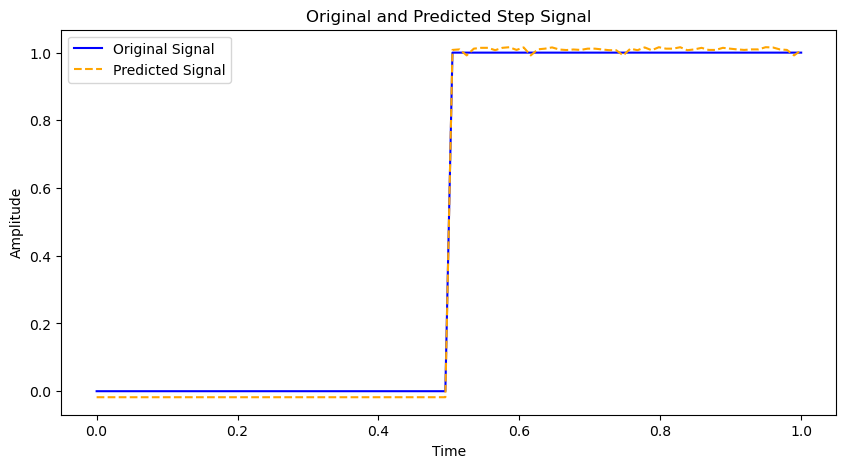

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler

def generate_spikes_step(num_samples):
    """Generates spikes based on a step function."""
    t = np.linspace(0, 1, num_samples)
    signal = np.where(t > 0.5, 1, 0)  # Step function
    spikes = np.random.poisson(signal * 10, num_samples)  # Poisson process for spike generation
    return spikes, t, signal

def build_lstm_model(input_shape):
    """Builds and returns an LSTM model."""
    model = Sequential([
        LSTM(50, return_sequences=True, input_shape=input_shape),
        Dropout(0.2),
        LSTM(50),
        Dropout(0.2),
        Dense(1)
    ])
    model.compile(optimizer='adam', loss='mse')
    return model

def process_and_plot_step():
    num_samples = 100
    spikes, t, signal = generate_spikes_step(num_samples)

    # Scale spikes
    scaler = MinMaxScaler()
    spikes_scaled = scaler.fit_transform(spikes.reshape(-1, 1)).flatten()


    spikes_scaled = spikes_scaled.reshape((spikes_scaled.shape[0], 1, 1))

    model = build_lstm_model((1, 1))
    model.fit(spikes_scaled, signal, epochs=1000, batch_size=10, verbose=1)

    predicted_signal = model.predict(spikes_scaled)


    plt.figure(figsize=(10, 5))
    plt.plot(t, signal, label='Original Signal', color='blue')
    plt.plot(t, predicted_signal.flatten(), linestyle='--', label='Predicted Signal', color='orange')
    plt.title('Original and Predicted Step Signal')
    plt.xlabel('Time')
    plt.ylabel('Amplitude')
    plt.legend()
    plt.show()

if __name__ == "__main__":
    process_and_plot_step()


Plotting the circuit

C:\Users\riakh\AppData\Roaming\Python\Python311\site-packages\qiskit\visualization\circuit\matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


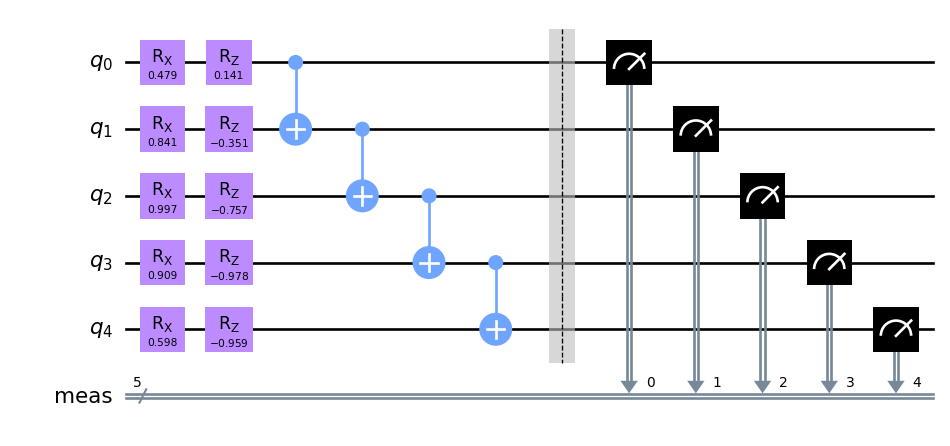

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from qiskit import QuantumCircuit, Aer, execute
from qiskit.circuit import ParameterVector
from qiskit.visualization import circuit_drawer

def generate_quantum_circuit(time, num_qubits=5):
    params = ParameterVector('theta', num_qubits * 2)
    qc = QuantumCircuit(num_qubits)
    
    
    for i in range(num_qubits):
        qc.rx(params[i], i)
        qc.rz(params[i + num_qubits], i)
    
    
    for i in range(num_qubits - 1):
        qc.cx(i, i + 1)
    
    qc.measure_all()

    param_dict = {params[i]: np.sin(time * (i + 1)) for i in range(num_qubits * 2)}
    qc = qc.assign_parameters(param_dict)
    
    return qc

def plot_quantum_circuit(time, num_qubits=5):
    circuit = generate_quantum_circuit(time, num_qubits)
    fig, ax = plt.subplots(figsize=(12, 8))
    circuit_drawer(circuit, output='mpl', ax=ax)
    plt.show()


plot_quantum_circuit(0.5)


Original signal: [0.00247262 0.00279037 0.00314881 0.00355314 0.00400918 0.00452348
 0.00510342 0.00575729 0.00649438 0.00732514 0.00826129 0.00931596
 0.01050384 0.01184139 0.01334695 0.01504103 0.01694644 0.01908854
 0.0214955  0.02419847 0.02723188 0.03063359 0.0344452  0.03871212
 0.04348381 0.04881379 0.05475969 0.06138311 0.06874939 0.07692721
 0.08598797 0.09600494 0.10705215 0.11920292 0.13252816 0.14709422
 0.16296047 0.18017659 0.1987796  0.21879075 0.24021244 0.26302536
 0.2871859  0.31262432 0.33924363 0.36691963 0.39550202 0.42481687
 0.45467026 0.48485312 0.51514688 0.54532974 0.57518313 0.60449798
 0.63308037 0.66075637 0.68737568 0.7128141  0.73697464 0.75978756
 0.78120925 0.8012204  0.81982341 0.83703953 0.85290578 0.86747184
 0.88079708 0.89294785 0.90399506 0.91401203 0.92307279 0.93125061
 0.93861689 0.94524031 0.95118621 0.95651619 0.96128788 0.9655548
 0.96936641 0.97276812 0.97580153 0.9785045  0.98091146 0.98305356
 0.98495897 0.98665305 0.98815861 0.98949616 0

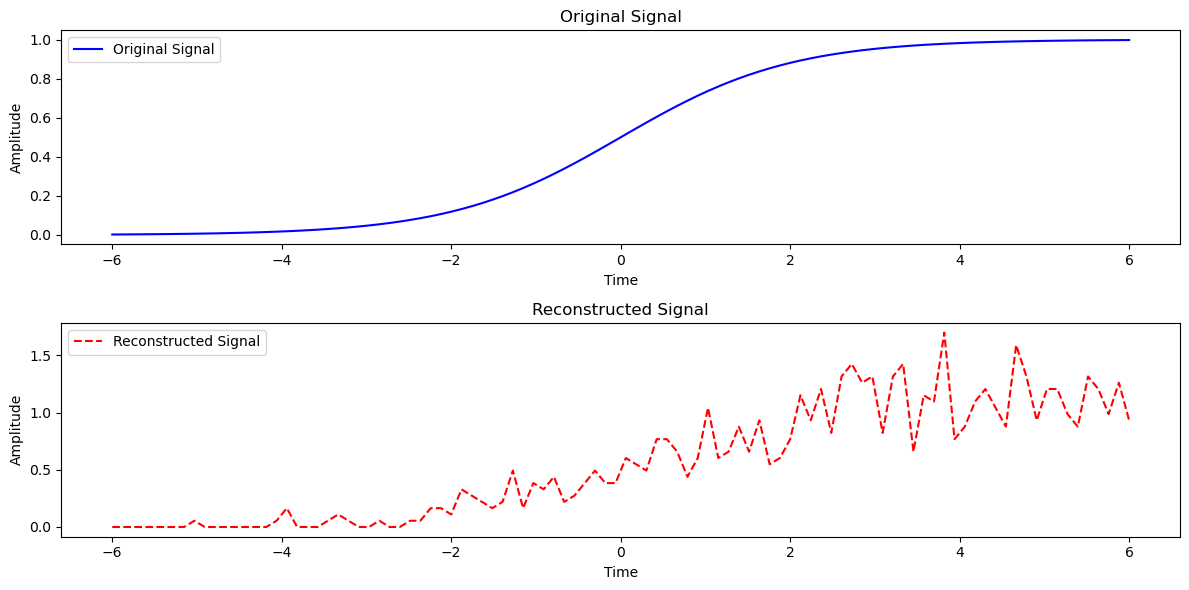

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from qiskit import QuantumCircuit, Aer, execute

# Constants
NUM_QUBITS = 8
NUM_SAMPLES = 100

def generate_spikes_log(num_samples=NUM_SAMPLES):
    t = np.linspace(0.01, 1, num_samples)
    signal = np.log(t)
    spikes = [np.random.poisson(abs(s) * 20) for s in signal]
    return spikes, t, signal

def generate_spikes_sigmoid(num_samples=NUM_SAMPLES):
    t = np.linspace(-6, 6, num_samples)
    signal = 1 / (1 + np.exp(-t))
    spikes = [np.random.poisson(abs(s) * 20) for s in signal]
    return spikes, t, signal

def calculate_phase(time):
    return 2 * np.pi * time

def enhanced_quantum_circuit(spikes, t):
    qc = QuantumCircuit(NUM_QUBITS)
    max_spike = max(spikes) if spikes else 1

    for i, (spike_count, time) in enumerate(zip(spikes, t)):
        normalized_amplitude = (spike_count / max_spike) * np.pi
        phase = calculate_phase(time)

        for qubit in range(NUM_QUBITS):
            qc.u(normalized_amplitude, phase, -phase, qubit)

    simulator = Aer.get_backend('statevector_simulator')
    job = execute(qc, simulator)
    result = job.result()
    return result.get_statevector(qc)

def spike_reconstruction(statevector, spikes):
    statevector_data = np.array(statevector)
    max_spike = max(spikes) if spikes else 1
    scale_factor = max_spike / np.max(np.abs(statevector_data))  # Derive scale factor

    reconstructed_signal = np.zeros(len(spikes))
    for i, amp in enumerate(statevector_data):
        reconstructed_signal += scale_factor * abs(amp) * np.array(spikes)
    return reconstructed_signal

def plot_results(t, original_signal, reconstructed_signal):
    plt.figure(figsize=(12, 6))

    plt.subplot(2, 1, 1)
    plt.plot(t, original_signal, 'b-', label='Original Signal')
    plt.title("Original Signal")
    plt.xlabel("Time")
    plt.ylabel("Amplitude")
    plt.legend()

    plt.subplot(2, 1, 2)
    plt.plot(t, reconstructed_signal, 'r--', label='Reconstructed Signal')
    plt.title("Reconstructed Signal")
    plt.xlabel("Time")
    plt.ylabel("Amplitude")
    plt.legend()

    plt.tight_layout()
    plt.show()

def main():
    function_to_test = "sigmoid"

    if function_to_test == "log":
        spikes, t, original_signal = generate_spikes_log()
    elif function_to_test == "sigmoid":
        spikes, t, original_signal = generate_spikes_sigmoid()
    else:
        raise ValueError("Invalid function choice. Use 'log' or 'sigmoid'.")

    statevector = enhanced_quantum_circuit(spikes, t)
    reconstructed_signal = spike_reconstruction(statevector, spikes)
    plot_results(t, original_signal, reconstructed_signal)

if __name__ == "__main__":
    main()


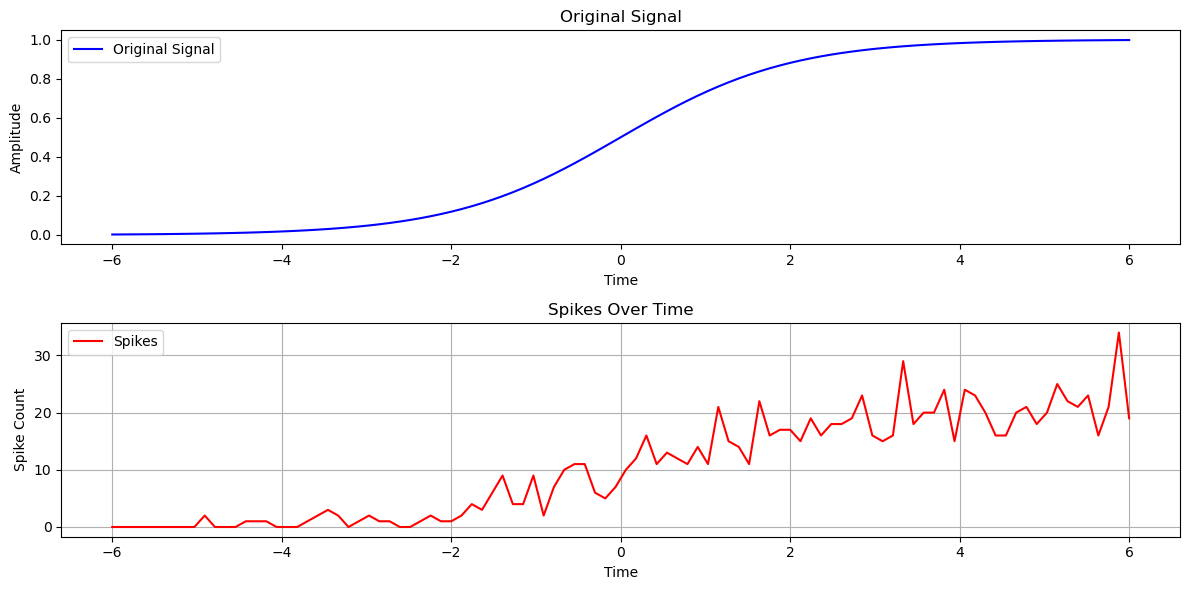

Bloch vector for Amplitude Encoding (RX): [0.0, -0.961825643172819, -0.27366299007208283]


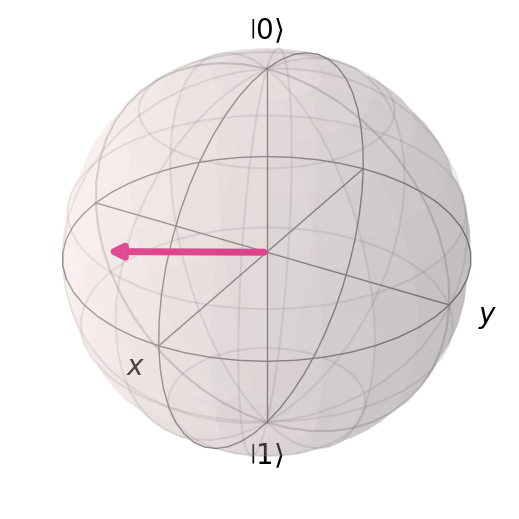

Bloch vector for Time Encoding (RZ): [0.0, 0.0, 0.9999999999999999]


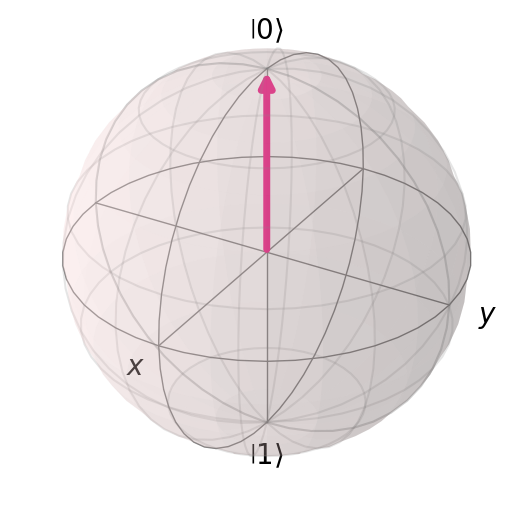

Bloch vector for Combined Encoding (RX + RZ): [-0.9089260202590773, 0.3145823541790008, -0.2736629900720827]


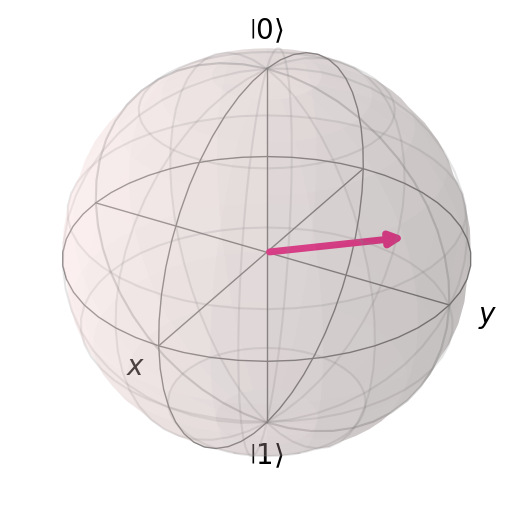

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from qiskit import QuantumCircuit, Aer, execute
from qiskit.visualization.bloch import Bloch
from qiskit.quantum_info import Statevector, Pauli

NUM_QUBITS = 1
NUM_SAMPLES = 100

def generate_spikes_sigmoid(num_samples=NUM_SAMPLES):
    t = np.linspace(-6, 6, num_samples)
    signal = 1 / (1 + np.exp(-t))
    spikes = [np.random.poisson(abs(s) * 20) for s in signal]
    return spikes, t, signal

def calculate_phase(time):
    return 2 * np.pi * time

def plot_spikes(t, spikes, signal):
    plt.figure(figsize=(12, 6))
    plt.subplot(2, 1, 1)
    plt.plot(t, signal, 'b-', label='Original Signal')
    plt.title("Original Signal")
    plt.xlabel("Time")
    plt.ylabel("Amplitude")
    plt.legend()

    plt.subplot(2, 1, 2)
    plt.plot(t, spikes, 'r-', label='Spikes')
    plt.title("Spikes Over Time")
    plt.xlabel("Time")
    plt.ylabel("Spike Count")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

def plot_bloch_encoding(rx_angle, rz_angle, label):
    qc = QuantumCircuit(NUM_QUBITS)
    if rx_angle != 0 or rz_angle != 0:
        qc.u(rx_angle, rz_angle, -rz_angle, 0)
    backend = Aer.get_backend('statevector_simulator')
    result = execute(qc, backend).result()
    statevector = Statevector(result.get_statevector())
    bloch_vector = [
        np.real(statevector.expectation_value(Pauli('X'))),
        np.real(statevector.expectation_value(Pauli('Y'))),
        np.real(statevector.expectation_value(Pauli('Z')))
    ]
    print(f"Bloch vector for {label}: {bloch_vector}")
    bloch = Bloch()
    bloch.add_vectors(bloch_vector)
    bloch.title = label
    bloch.show()

def main():
    spikes, t, original_signal = generate_spikes_sigmoid()
    plot_spikes(t, spikes, original_signal)
    time_point = t[80]
    spike_count = spikes[80]
    max_spike = max(spikes) if spikes else 1
    normalized_amplitude = (spike_count / max_spike) * np.pi
    phase = calculate_phase(time_point)
    plot_bloch_encoding(normalized_amplitude, 0, "Amplitude Encoding (U Gate)")
    plot_bloch_encoding(0, phase, "Time Encoding (U Gate)")
    plot_bloch_encoding(normalized_amplitude, phase, "Combined Encoding (U Gate)")

if __name__ == "__main__":
    main()


Plotting the Spikes

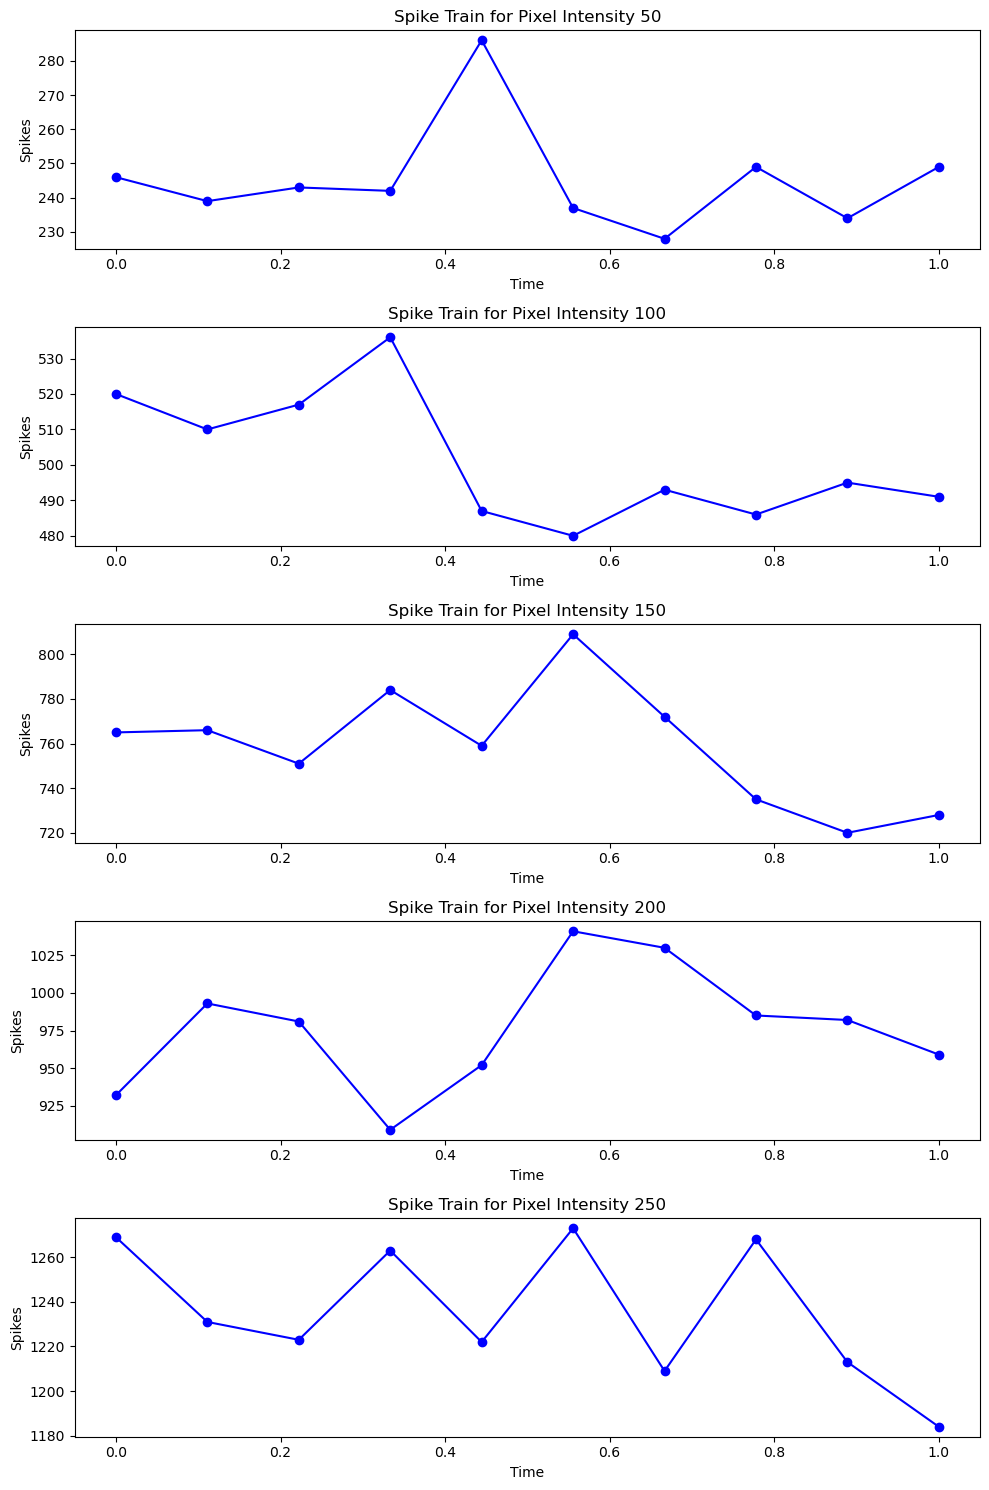

In [14]:
import numpy as np
import matplotlib.pyplot as plt

def generate_spikes(image, rate=5, duration=10):
    time_steps = np.linspace(0, 1, duration)
    spikes = np.zeros((image.shape[0], image.shape[1], duration))
    
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            lam = image[i, j] * rate
            spikes[i, j, :] = np.random.poisson(lam=lam, size=duration)
    
    return spikes, time_steps


example_image = np.array([[50, 100, 150, 200, 250],
                          [50, 100, 150, 200, 250],
                          [50, 100, 150, 200, 250],
                          [50, 100, 150, 200, 250],
                          [50, 100, 150, 200, 250]])

# Generate spikes
spikes, time_steps = generate_spikes(example_image, rate=5, duration=10)


fig, axs = plt.subplots(5, 1, figsize=(10, 15))
pixel_intensities = [50, 100, 150, 200, 250]
for i, intensity in enumerate(pixel_intensities):
    pixel_spikes = spikes[0, i, :]
    axs[i].plot(time_steps, pixel_spikes, 'bo-')
    axs[i].set_title(f"Spike Train for Pixel Intensity {intensity}")
    axs[i].set_xlabel("Time")
    axs[i].set_ylabel("Spikes")

plt.tight_layout()
plt.show()


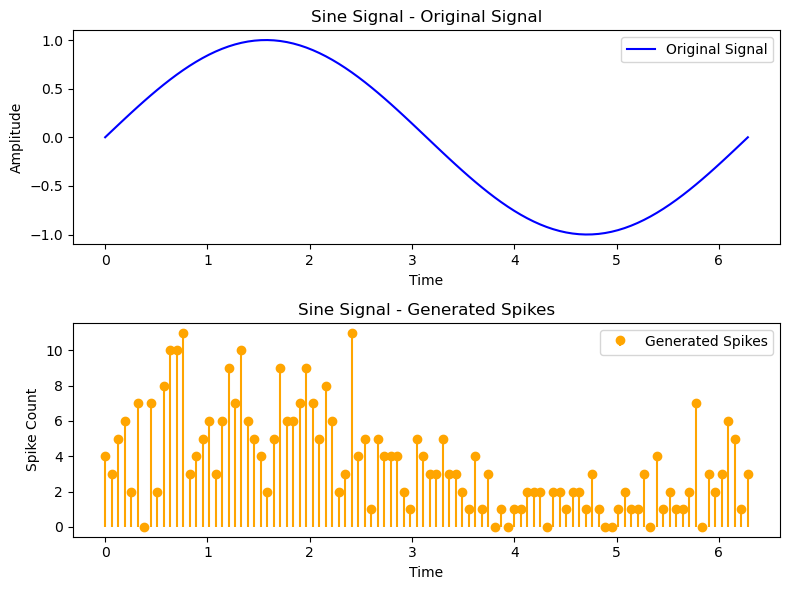

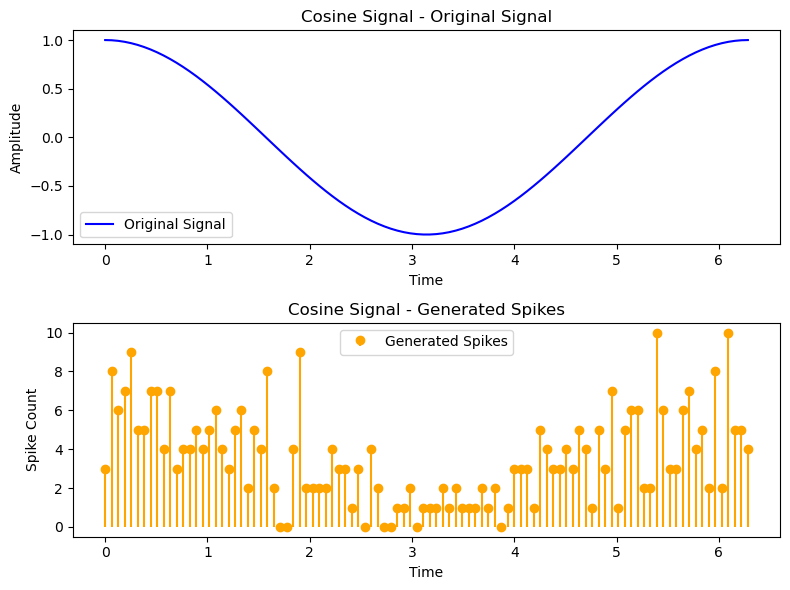

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from qiskit import QuantumCircuit, Aer, execute
from qiskit.circuit import ParameterVector
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler

def generate_poisson_spikes(signal_function, num_samples):
    t = np.linspace(0, 2 * np.pi, num_samples)
    signal = signal_function(t)
    normalized_signal = (signal - np.min(signal)) / (np.max(signal) - np.min(signal)) * 5 + 1
    spikes = np.random.poisson(normalized_signal)
    return spikes, t, signal

def process_and_plot(signal_function, title):
    num_samples = 100
    spikes, t, signal = generate_poisson_spikes(signal_function, num_samples)
    plt.figure(figsize=(8, 6))
    plt.subplot(2, 1, 1)
    plt.plot(t, signal, label='Original Signal', color='blue')
    plt.title(f'{title} - Original Signal')
    plt.xlabel('Time')
    plt.ylabel('Amplitude')
    plt.legend()
    plt.subplot(2, 1, 2)
    plt.stem(t, spikes, linefmt='orange', markerfmt='o', basefmt=" ", label='Generated Spikes')
    plt.title(f'{title} - Generated Spikes')
    plt.xlabel('Time')
    plt.ylabel('Spike Count')
    plt.legend()
    plt.tight_layout()
    plt.show()

def main():
    process_and_plot(np.sin, 'Sine Signal')
    process_and_plot(np.cos, 'Cosine Signal')

if __name__ == "__main__":
    main()


In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Flatten, Input, concatenate, Layer
from tensorflow.keras.datasets import mnist
from qiskit import Aer, execute
from qiskit.circuit import ParameterVector, QuantumCircuit

# Load and preprocess data
def load_and_preprocess_data():
    (x_train, y_train), (x_test, y_test) = mnist.load_data()
    # Filter for digits 0 and 1
    train_filter = np.isin(y_train, [0, 1])
    test_filter = np.isin(y_test, [0, 1])
    x_train, y_train = x_train[train_filter], y_train[train_filter]
    x_test, y_test = x_test[test_filter], y_test[test_filter]

    x_train = np.expand_dims(x_train, -1) / 255.0
    x_test = np.expand_dims(x_test, -1) / 255.0
    return x_train, y_train, x_test, y_test

def generate_spikes(image, rate=5, duration=10):
    # Define the duration for spike generation
    time_steps = np.linspace(0, 1, duration)
    # Initialize the spike array with the same spatial dimensions as the image but with an added time dimension
    spikes = np.zeros((image.shape[0], image.shape[1], duration))
    
    # Generate spikes for each pixel over the duration
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            lam = image[i, j] * rate  # Lambda for Poisson distribution based on pixel intensity
            spikes[i, j, :] = np.random.poisson(lam=lam, size=duration)
    
    return spikes, time_steps

def encode_quantum_features(spikes, time_steps, num_qubits=5, shots=1024):
    simulator = Aer.get_backend('aer_simulator')
    params = ParameterVector('theta', 2 * num_qubits)
    features = []

    for t in range(spikes.shape[2]):  # Loop over each time step
        qc = QuantumCircuit(num_qubits)
        param_binds = {}
        for i in range(num_qubits):
            amplitude = spikes[i % spikes.shape[0], i % spikes.shape[1], t]  
            time_encoded = time_steps[t] * 2 * np.pi  # Temporal encoding
            param_binds[params[2 * i]] = amplitude * np.pi  # Amplitude modulation
            param_binds[params[2 * i + 1]] = time_encoded  # Time modulation

            
            qc.rx(params[2 * i], i)
            qc.rz(params[2 * i + 1], i)

        qc.measure_all()

        # Bind parameters and execute the circuit
        compiled_circuit = qc.bind_parameters(param_binds)
        job = execute(compiled_circuit, simulator, shots=shots)
        result = job.result()
        counts = result.get_counts(compiled_circuit)
        feature_vector = np.array([counts.get(bin(j)[2:].zfill(num_qubits), 0) for j in range(2**num_qubits)])
        features.append(feature_vector / np.sum(feature_vector))

    # Flatten features across all time steps
    return np.array(features).flatten()

class ProbabilisticSwitch(Layer):
    def __init__(self, switch_probability=0.5, **kwargs):
        super(ProbabilisticSwitch, self).__init__(**kwargs)
        self.switch_probability = switch_probability

    def call(self, inputs):
        feature1, feature2 = inputs
        random_val = tf.random.uniform([])
        return tf.cond(
            random_val < self.switch_probability,
            lambda: feature1,
            lambda: feature2
        )

def build_hybrid_model(image_input_shape, quantum_features_shape, switch_probability=0.5):
    # Quantum input branch
    quantum_input = Input(shape=(quantum_features_shape,), name="quantum_input")
    q = Dense(128, activation='relu')(quantum_input)
    q = Dropout(0.5)(q)
    q = Dense(64, activation='relu')(q)
    q = Dropout(0.5)(q)
    quantum_features = Dense(32, activation='relu')(q)

    # Image input branch
    image_input = Input(shape=image_input_shape, name="image_input")
    x = Flatten()(image_input)
    x = Dense(32, activation='relu')(x)
    x = Dropout(0.5)(x)
    image_features = Dense(16, activation='relu')(x)

    # Apply probabilistic switch to image features
    switched_image_features = ProbabilisticSwitch(switch_probability)([image_features, tf.zeros_like(image_features)])

    # Final dense layers using quantum features primarily
    combined_features = concatenate([quantum_features, switched_image_features])
    y = Dense(64, activation='relu')(combined_features)
    y = Dropout(0.5)(y)
    y = Dense(32, activation='relu')(y)
    y = Dropout(0.5)(y)
    outputs = Dense(2, activation='softmax')(y)

    # Create and compile model
    model = Model(inputs=[quantum_input, image_input], outputs=outputs)
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

def main():
    x_train, y_train, x_test, y_test = load_and_preprocess_data()

    #Example
    spikes, time_steps = generate_spikes(x_train[0])
    quantum_features = encode_quantum_features(spikes, time_steps)

    
    model = build_hybrid_model(x_train[0].shape, quantum_features.shape[0])
    
    
    quantum_train_features = np.array([encode_quantum_features(*generate_spikes(img)) for img in x_train])
    quantum_test_features = np.array([encode_quantum_features(*generate_spikes(img)) for img in x_test])
    
    
    model.fit([quantum_train_features, x_train], y_train, epochs=100, validation_split=0.1)
    
    
    loss, acc = model.evaluate([quantum_test_features, x_test], y_test)
    print('\nTest loss:', loss, 'Test accuracy:', acc)

if __name__ == "__main__":
    main()


C:\Users\riakh\AppData\Local\Temp\ipykernel_20692\756857098.py:57: DeprecationWarning: The method ``qiskit.circuit.quantumcircuit.QuantumCircuit.bind_parameters()`` is deprecated as of qiskit 0.45.0. It will be removed no earlier than 3 months after the release date. Use assign_parameters() instead
  compiled_circuit = qc.bind_parameters(param_binds)




Epoch 1/100


357/357 [==============================] - 8s 9ms/step - loss: 0.4505 - accuracy: 0.7179 - val_loss: 0.2980 - val_accuracy: 0.7932
Epoch 2/100
357/357 [==============================] - 2s 6ms/step - loss: 0.3671 - accuracy: 0.7560 - val_loss: 0.3973 - val_accuracy: 0.7214
Epoch 3/100
357/357 [==============================] - 2s 6ms/step - loss: 0.3242 - accuracy: 0.7859 - val_loss: 0.3150 - val_accuracy: 0.7814
Epoch 4/100
357/357 [==============================] - 2s 6ms/step - loss: 0.3211 - accuracy: 0.7843 - val_loss: 0.3252 - val_accuracy: 0.7751
Epoch 5/100
357/357 [==============================] - 2s 6ms/step - loss: 0.3443 - accuracy: 0.7709 - val_loss: 0.3507 - val_accuracy: 0.7530
Epoch 6/100
357/357 [==============================] - 2s 7ms/step - loss: 0.3413 - accuracy: 0.7745 - val_loss: 0.3085 - val_accuracy: 0.7790
Epoch 7/100
357/357 [==============================] - 2s 7ms/step - loss: 0.3693 - accuracy: 0.7560 - val_loss: 0.4552 - val_accuracy: 0.

In [9]:
pip install --upgrade openpyxl


   ---------------------------------------- 0.0/250.9 kB ? eta -:--:--
   ---- ----------------------------------- 30.7/250.9 kB 1.3 MB/s eta 0:00:01
   ------ -------------------------------- 41.0/250.9 kB 653.6 kB/s eta 0:00:01
   -------------- ------------------------ 92.2/250.9 kB 744.7 kB/s eta 0:00:01
   ------------------ ------------------- 122.9/250.9 kB 798.9 kB/s eta 0:00:01
   ----------------------------- -------- 194.6/250.9 kB 980.4 kB/s eta 0:00:01
   ---------------------------------------  245.8/250.9 kB 1.1 MB/s eta 0:00:01
   -------------------------------------- 250.9/250.9 kB 904.8 kB/s eta 0:00:00
  Attempting uninstall: openpyxl
    Found existing installation: openpyxl 3.0.10
    Uninstalling openpyxl-3.0.10:
      Successfully uninstalled openpyxl-3.0.10


Time Series Data Analysis

Epoch 1/200
25/25 [==============================] - 3s 21ms/step - loss: 0.3448 - mae: 0.4991 - val_loss: 0.0469 - val_mae: 0.1643
Epoch 2/200
25/25 [==============================] - 0s 7ms/step - loss: 0.0718 - mae: 0.2070 - val_loss: 0.0237 - val_mae: 0.1305
Epoch 3/200
25/25 [==============================] - 0s 8ms/step - loss: 0.0488 - mae: 0.1677 - val_loss: 0.0180 - val_mae: 0.1208
Epoch 4/200
25/25 [==============================] - 0s 8ms/step - loss: 0.0381 - mae: 0.1534 - val_loss: 0.0152 - val_mae: 0.1095
Epoch 5/200
25/25 [==============================] - 0s 6ms/step - loss: 0.0372 - mae: 0.1464 - val_loss: 0.0262 - val_mae: 0.1508
Epoch 6/200
25/25 [==============================] - 0s 5ms/step - loss: 0.0312 - mae: 0.1350 - val_loss: 0.0238 - val_mae: 0.1410
Epoch 7/200
25/25 [==============================] - 0s 6ms/step - loss: 0.0293 - mae: 0.1318 - val_loss: 0.0270 - val_mae: 0.1512
Epoch 8/200
25/25 [==============================] - 0s 6ms/step - loss: 0.0251 - 

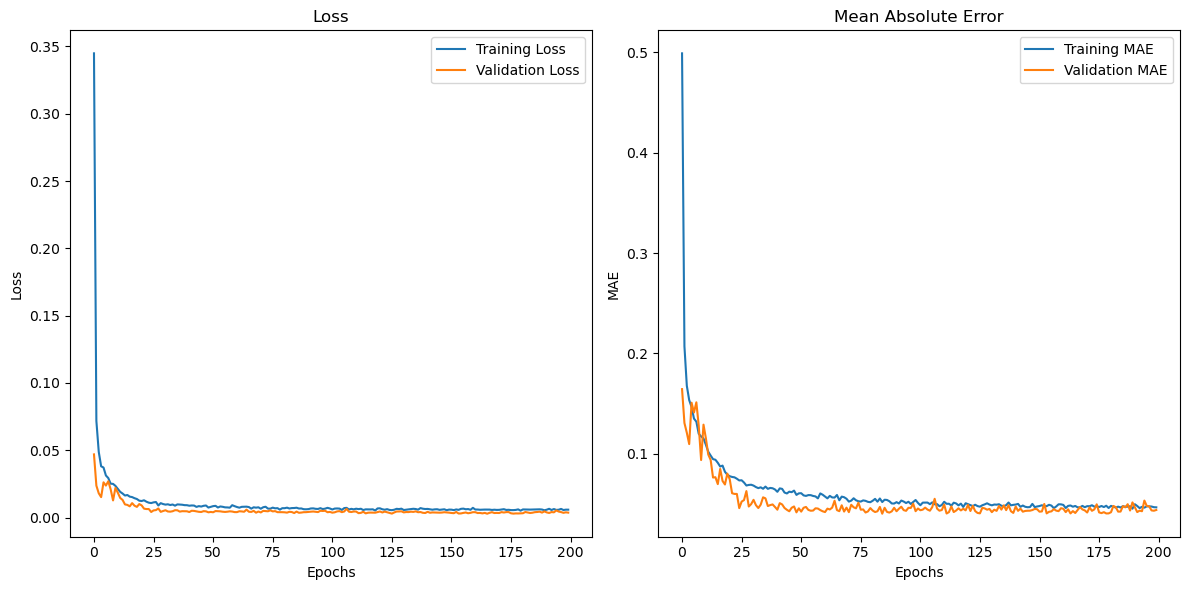

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from qiskit import QuantumCircuit, Aer, execute
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout
from qiskit.circuit import ParameterVector

# Constants
NUM_QUBITS = 8  
NUM_SAMPLES = 100 

def load_mackey_glass_data(filepath):
    # Load Mackey-Glass series data 
    df = pd.read_excel(filepath)
    return df['t'].values, df['t-taw'].values, df['t+1'].values

def calculate_phase(time):
    """Calculates phase based on time for encoding."""
    return 2 * np.pi * time

def encode_quantum_features(spikes, times, num_qubits=NUM_QUBITS, shots=1024):
    simulator = Aer.get_backend('aer_simulator')
    features = []

    max_spike = max(spikes) if spikes else 1  # Ensure max_spike is never zero
    
    for spike, time in zip(spikes, times):
        qc = QuantumCircuit(num_qubits)
        normalized_amplitude = (spike / max_spike) * np.pi  # Amplitude normalization
        phase = calculate_phase(time)
        for qubit in range(num_qubits):
            qc.u(normalized_amplitude, phase, -phase, qubit)
        
        qc.measure_all()
        job = execute(qc, simulator, shots=shots)
        result = job.result()
        counts = result.get_counts(qc)
        feature_vector = np.array([counts.get(bin(j)[2:].zfill(num_qubits), 0) for j in range(2**num_qubits)])
        features.append(feature_vector / np.sum(feature_vector))
    
    return np.array(features).flatten()

def build_hybrid_model(input_shape):
    quantum_input = Input(shape=(input_shape,), name="quantum_input")
    q = Dense(128, activation='relu')(quantum_input)
    q = Dropout(0.5)(q)
    q = Dense(64, activation='relu')(q)
    q = Dropout(0.5)(q)
    q = Dense(32, activation='relu')(q)
    outputs = Dense(1, activation='linear')(q)
    model = Model(inputs=quantum_input, outputs=outputs)
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    return model

def main():
    t, t_taw, t_plus_1 = load_mackey_glass_data("C:\\Users\\riakh\\Downloads\\archive (13)\\Mackey-Glass Time Series(taw17).xlsx")

    # Predicting t-taw at t+1 (shifting t-taw right by one step)
    y = np.roll(t_taw, -1)[:-1]  # Shift t-taw to align with t+1 and ignore the last item
    quantum_features = np.array([encode_quantum_features([taw], [time]) for taw, time in zip(t_taw[:-1], t[:-1])])  # Ignore the last item for alignment

    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(quantum_features, y, test_size=0.2, random_state=42)

    # Build the hybrid model
    model = build_hybrid_model(quantum_features.shape[1])

    # Train the model
    history = model.fit(X_train, y_train, epochs=200, validation_split=0.1)

    # Evaluate the model
    loss, mae = model.evaluate(X_test, y_test)
    print('\nTest loss:', loss, 'Test MAE:', mae)

    # Plot training and validation loss
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    # Plot training and validation MAE
    plt.subplot(1, 2, 2)
    plt.plot(history.history['mae'], label='Training MAE')
    plt.plot(history.history['val_mae'], label='Validation MAE')
    plt.title('Mean Absolute Error')
    plt.xlabel('Epochs')
    plt.ylabel('MAE')
    plt.legend()

    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    main()


Epoch 1/100
82/82 [==============================] - 1s 4ms/step - loss: 0.1079 - mae: 0.2826 - val_loss: 0.0306 - val_mae: 0.1403 - lr: 0.0010
Epoch 2/100
82/82 [==============================] - 0s 2ms/step - loss: 0.0187 - mae: 0.1061 - val_loss: 0.0119 - val_mae: 0.0879 - lr: 0.0010
Epoch 3/100
82/82 [==============================] - 0s 2ms/step - loss: 0.0118 - mae: 0.0845 - val_loss: 0.0104 - val_mae: 0.0823 - lr: 0.0010
Epoch 4/100
82/82 [==============================] - 0s 2ms/step - loss: 0.0109 - mae: 0.0815 - val_loss: 0.0104 - val_mae: 0.0825 - lr: 0.0010
Epoch 5/100
82/82 [==============================] - 0s 2ms/step - loss: 0.0110 - mae: 0.0818 - val_loss: 0.0105 - val_mae: 0.0828 - lr: 0.0010
Epoch 6/100
82/82 [==============================] - 0s 3ms/step - loss: 0.0110 - mae: 0.0820 - val_loss: 0.0104 - val_mae: 0.0825 - lr: 0.0010
Epoch 7/100
82/82 [==============================] - 0s 2ms/step - loss: 0.0111 - mae: 0.0819 - val_loss: 0.0105 - val_mae: 0.0828 - lr:

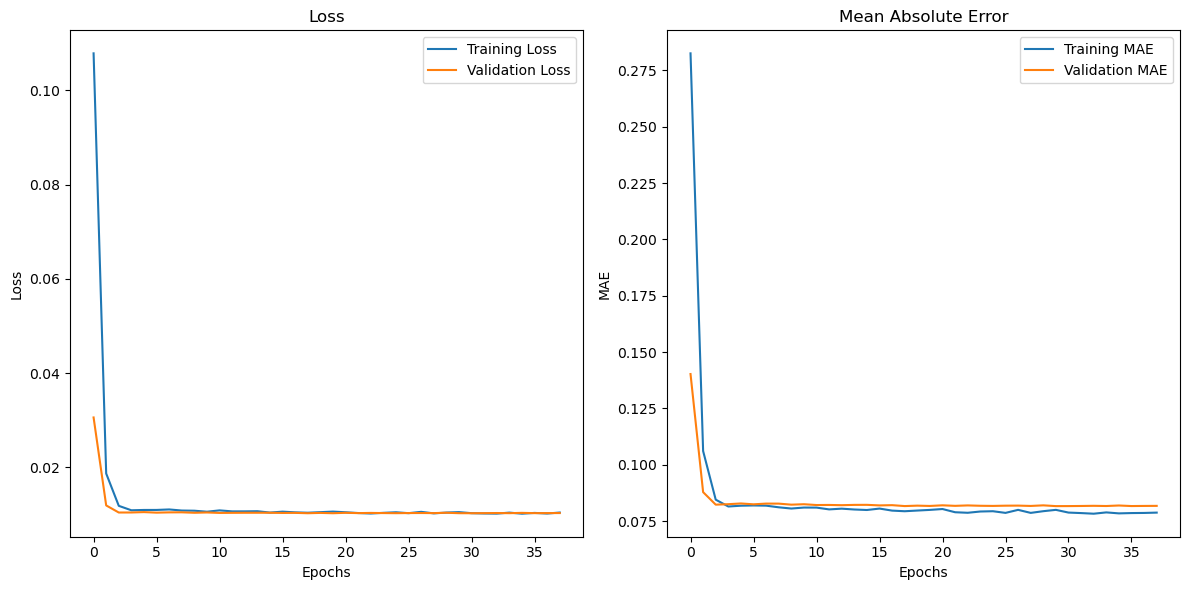

In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from qiskit import QuantumCircuit, Aer, execute
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Constants
NUM_QUBITS = 8  # Number of qubits

def load_temperature_data(filepath):
    # Load temperature data
    df = pd.read_csv(filepath, parse_dates=['Date'], dayfirst=True)
    df['Daily minimum temperatures'] = pd.to_numeric(df['Daily minimum temperatures'], errors='coerce')
    df.dropna(inplace=True)  # Remove any rows with NaN values
    return df['Daily minimum temperatures'].values

def calculate_phase(time):
    """Calculates phase based on time for encoding."""
    return 2 * np.pi * time

def encode_quantum_features(amplitudes, times, num_qubits=NUM_QUBITS, shots=1024):
    simulator = Aer.get_backend('aer_simulator')
    feature_matrix = []

    max_amplitude = max(amplitudes) if len(amplitudes) > 0 else 1

    for amplitude, time in zip(amplitudes, times):
        qc = QuantumCircuit(num_qubits)
        normalized_amplitude = (amplitude / max_amplitude) * np.pi
        phase = calculate_phase(time)

        for qubit in range(num_qubits):
            qc.rx(normalized_amplitude, qubit)
            qc.rz(phase, qubit)

        for qubit in range(num_qubits - 1):
            qc.cx(qubit, qubit + 1)

        qc.measure_all()
        job = execute(qc, simulator, shots=shots)
        result = job.result()
        counts = result.get_counts(qc)
        feature_vector = np.array([counts.get(bin(j)[2:].zfill(num_qubits), 0) for j in range(2**num_qubits)])
        feature_matrix.append(feature_vector / np.sum(feature_vector))

    return np.array(feature_matrix)

def build_lstm_model(input_shape):
    model = Sequential([
        LSTM(50, activation='relu', input_shape=input_shape),
        Dropout(0.2),
        Dense(1)
    ])
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    return model

def main():
    filepath = "C:\\Users\\riakh\\Downloads\\daily-minimum-temperatures-in-me.csv"  
    temperatures = load_temperature_data(filepath)

    
    scaler = MinMaxScaler()
    temperatures_normalized = scaler.fit_transform(temperatures.reshape(-1, 1)).flatten()
    
    
    times = np.linspace(0, 1, len(temperatures_normalized))

    
    quantum_features = encode_quantum_features(temperatures_normalized, times)
    
    
    X = quantum_features.reshape((quantum_features.shape[0], 1, quantum_features.shape[1]))
    y = temperatures_normalized[1:]  # Next day temperature prediction
    X = X[:-1]  # Align X with shifted y

    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Build and train LSTM model
    model = build_lstm_model((X_train.shape[1], X_train.shape[2]))
    early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)
    reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=10)
    history = model.fit(X_train, y_train, epochs=100, validation_split=0.1,
                        callbacks=[early_stopping, reduce_lr])

    # Evaluate the model
    loss, mae = model.evaluate(X_test, y_test)
    print('\nTest loss:', loss, 'Test MAE:', mae)

    
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['mae'], label='Training MAE')
    plt.plot(history.history['val_mae'], label='Validation MAE')
    plt.title('Mean Absolute Error')
    plt.xlabel('Epochs')
    plt.ylabel('MAE')
    plt.legend()

    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    main()



Epoch 1/100
29/29 [==============================] - 1s 8ms/step - loss: 0.3429 - mae: 0.5429 - val_loss: 0.2699 - val_mae: 0.4709
Epoch 2/100
29/29 [==============================] - 0s 2ms/step - loss: 0.2037 - mae: 0.3951 - val_loss: 0.1327 - val_mae: 0.3025
Epoch 3/100
29/29 [==============================] - 0s 2ms/step - loss: 0.0879 - mae: 0.2326 - val_loss: 0.0470 - val_mae: 0.1763
Epoch 4/100
29/29 [==============================] - 0s 2ms/step - loss: 0.0317 - mae: 0.1453 - val_loss: 0.0171 - val_mae: 0.1134
Epoch 5/100
29/29 [==============================] - 0s 2ms/step - loss: 0.0133 - mae: 0.0933 - val_loss: 0.0056 - val_mae: 0.0606
Epoch 6/100
29/29 [==============================] - 0s 2ms/step - loss: 0.0058 - mae: 0.0578 - val_loss: 0.0018 - val_mae: 0.0289
Epoch 7/100
29/29 [==============================] - 0s 2ms/step - loss: 0.0044 - mae: 0.0486 - val_loss: 0.0010 - val_mae: 0.0220
Epoch 8/100
29/29 [==============================] - 0s 2ms/step - loss: 0.0040 - m

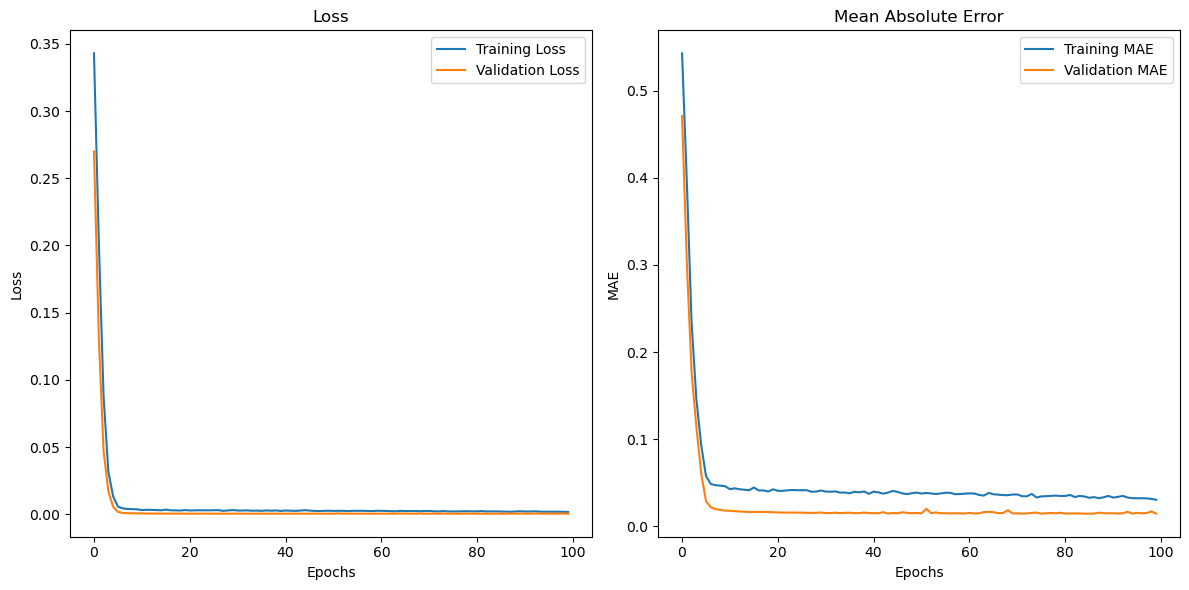

In [79]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from qiskit import QuantumCircuit, Aer, execute
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Constants
NUM_QUBITS = 8  

def load_finance_data(filepath):
    
    df = pd.read_excel(filepath, parse_dates=['Date'])

   
    if df['Close*'].dtype == 'object':
        
        df['Close*'] = pd.to_numeric(df['Close*'].str.replace(',', ''), errors='coerce')
    else:
      
        df['Close*'] = pd.to_numeric(df['Close*'], errors='coerce')

    df.dropna(subset=['Close*'], inplace=True)  
    return df['Close*'].values


def calculate_phase(time):
    """Calculates phase based on time for encoding."""
    return 2 * np.pi * time

def encode_quantum_features(values, times, num_qubits=NUM_QUBITS, shots=1024):
    simulator = Aer.get_backend('aer_simulator')
    feature_matrix = []

    max_value = max(values) if len(values) > 0 else 1

    for value, time in zip(values, times):
        qc = QuantumCircuit(num_qubits)
        normalized_value = (value / max_value) * np.pi
        phase = calculate_phase(time)

        for qubit in range(num_qubits):
            qc.rx(normalized_value, qubit)  
            qc.rz(phase, qubit)
        
        
        for qubit in range(num_qubits - 1):
            qc.cx(qubit, qubit + 1)

        qc.measure_all()
        job = execute(qc, simulator, shots=shots)
        result = job.result()
        counts = result.get_counts(qc)
        feature_vector = np.array([counts.get(bin(j)[2:].zfill(num_qubits), 0) for j in range(2**num_qubits)])
        feature_matrix.append(feature_vector / np.sum(feature_vector)) 

    return np.array(feature_matrix)

def build_lstm_model(input_shape):
    model = Sequential([
        LSTM(50, activation='relu', input_shape=input_shape),
        Dropout(0.2),
        Dense(1)
    ])
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    return model

def main():
    filepath = "C:\\Users\\riakh\\Downloads\\archive (14)\\yahoo_data.xlsx"  
    close_values = load_finance_data(filepath)

    
    scaler = MinMaxScaler()
    close_values_normalized = scaler.fit_transform(close_values.reshape(-1, 1)).flatten()
    
    # Generate time points for phase encoding
    times = np.linspace(0, 1, len(close_values_normalized))

    # Generate quantum features
    quantum_features = encode_quantum_features(close_values_normalized, times)
    
   
    X = quantum_features.reshape((quantum_features.shape[0], 1, quantum_features.shape[1]))
    y = close_values_normalized[1:]  # Next day close value prediction
    X = X[:-1]  # Align X with shifted y

    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    
    model = build_lstm_model((X_train.shape[1], X_train.shape[2]))
    history = model.fit(X_train, y_train, epochs=100, validation_split=0.1)

    # Evaluate the model
    loss, mae = model.evaluate(X_test, y_test)
    print('\nTest loss:', loss, 'Test MAE:', mae)

    
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['mae'], label='Training MAE')
    plt.plot(history.history['val_mae'], label='Validation MAE')
    plt.title('Mean Absolute Error')
    plt.xlabel('Epochs')
    plt.ylabel('MAE')
    plt.legend()

    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    main()
